In [1]:
import numpy as np
import gc
import os
import sys
sys.path.append("../")
sys.path.append("../03_experimental_data_chemical_shifts/")
import matplotlib.pyplot as plt

import SRT_optimization as srt
import handle_BMBR as BMBR
from matplotlib.backends.backend_pdf import PdfPages


gc.collect()

0

<H3>Load relaxations, chemical shifts and predicted secondary structures</H3>

In [2]:
BMBR_path="../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/"
PPSpred_path="../04_predict_2str_PSSpred/data/"

experiments=BMBR.load_BMBR(BMBR_path)
secondary_structure=BMBR.load_PSSpred_structure(PPSpred_path)

<H4>Sort IDs according to predicted disordered part</H4>

In [3]:
disordered={}
lengths={}
for experiment in secondary_structure:
    procentage=secondary_structure[experiment]["codes"].count(0)/len(secondary_structure[experiment]["codes"])
    disordered[experiment]=procentage
    lengths[experiment]=len(secondary_structure[experiment]["codes"])

sorted_by_disordered=sorted(disordered, key=lambda protein: (disordered[protein],lengths[protein]), reverse=True)

In [4]:
sorted_lengths=dict(sorted(lengths.items(),  key=lambda item: item[1]))

In [102]:
limits=[10*i for i in range(1,45)]
finals={}
for key,le in sorted_lengths.items():
    if le not in finals:
        finals[le]=0
    finals[le]+=1

In [103]:
count=0
rougher={}
for i in limits:
    rougher[i]=0
for i in finals:
    while True:
        if i<limits[count]:
            rougher[limits[count]]+=finals[i]
            break
        else:
            count+=1

In [104]:
final=np.array(list(finals.items()))
final2=np.array(list(rougher.items()))

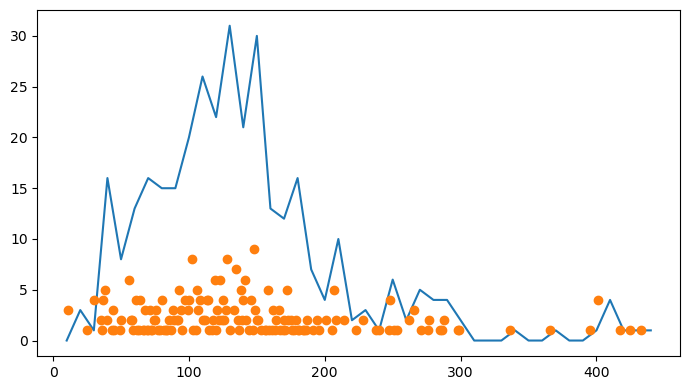

In [107]:
plt.subplots(figsize=(7, 4))
plt.plot(final2[:,0],final2[:,1])
plt.plot(final[:,0],final[:,1],'o')

In [73]:
for_hist=[]
for i in final_tuple:
    for_hist.append(list(i))

30834


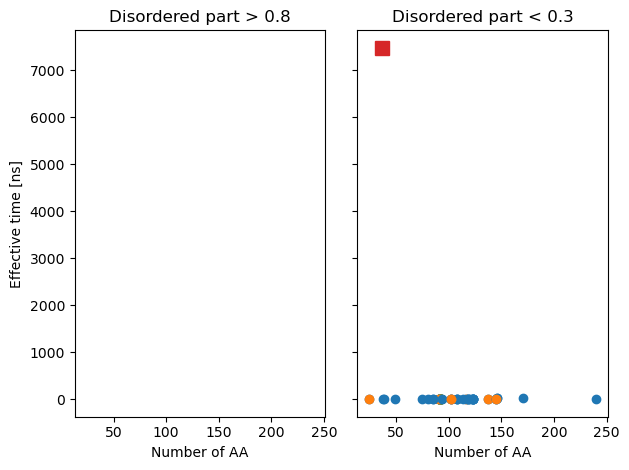

In [4]:
fig,ax=plt.subplots(1,2,sharey=True,sharex=True)
plt.rcParams["figure.figsize"] = [9, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 10})
fig.patch.set_facecolor('xkcd:white')


for entry in sorted_by_disordered:
    plot_secondary=False
    with open("../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/bmr"+entry+"/bmr"+entry+"_3.str") as f:
        for line in f:
            if "_Entity.Polymer_type" in line:
                if len(line.split())>1:
                    if "polypeptide" in line.split()[1]:
                        plot_secondary=True
                        

                
    if disordered[entry]>0.8 and plot_secondary:
        i=0
        for field in experiments[entry]:
            try:
                effTimes=[]
                for R2 in experiments[entry][field]["results"]["R2"]:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                ax[0].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"o",c="C"+str(i))
                if np.mean(effTimes)>2.0*10**(-7):
                    print(entry)
                if entry=="50553" or entry=="16482":
                     ax[0].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"s",c="C3",markersize=10)
                i+=1
            except Exception as e:
                pass
    elif not disordered[entry]>0.8:
        break

ax[0].set_title("Disordered part > 0.8")
ax[0].set_xlabel("Number of AA")
ax[0].set_ylabel("Effective time [ns]")


for entry in sorted_by_disordered:
    plot_secondary=False
    with open("../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/bmr"+entry+"/bmr"+entry+"_3.str") as f:
        for line in f:
            if "_Entity.Polymer_type" in line:
                if len(line.split())>1:
                    if "polypeptide" in line.split()[1]:
                        plot_secondary=True
    if disordered[entry]<0.3 and plot_secondary:
        i=0
        for field in experiments[entry]:
            try:
                effTimes=[]
                for R2 in experiments[entry][field]["results"]["R2"]:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                ax[1].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"o",c="C"+str(i))
                if np.mean(effTimes)>2.0*10**(-7):
                    print(entry)
                if entry=="30834" or entry=="15930" or entry=="26788":
                     ax[1].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"s",c="C3",markersize=10)
                i+=1
            except Exception as e:
                pass
    

ax[1].set_title("Disordered part < 0.3")
ax[1].set_xlabel("Number of AA")
plt.savefig("length_vs_time03.png")

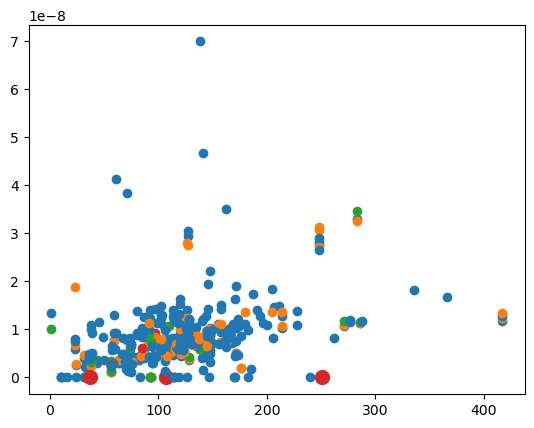

In [35]:
for entry in sorted_by_disordered:
    plot_secondary=False
    with open("../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/bmr"+entry+"/bmr"+entry+"_3.str") as f:
        for line in f:
            if "_Entity.Polymer_type" in line:
                if len(line.split())>1:
                    if "polypeptide" in line.split()[1]:
                        plot_secondary=True
    if disordered[entry]<0.8 and plot_secondary:
        i=0
        for field in experiments[entry]:
            try:
                effTimes=[]
                for R2 in experiments[entry][field]["results"]["R2"]:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                plt.plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes),"o",c="C"+str(i))
                if np.mean(effTimes)>2.0*10**(-7):
                    print(entry)
                if entry=="30834" or entry=="15930" or entry=="26788":
                     plt.plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes),"o",c="C3",markersize=10)
                i+=1
            except Exception as e:
                pass
    

Text(0.5, 0, 'Number of AA')

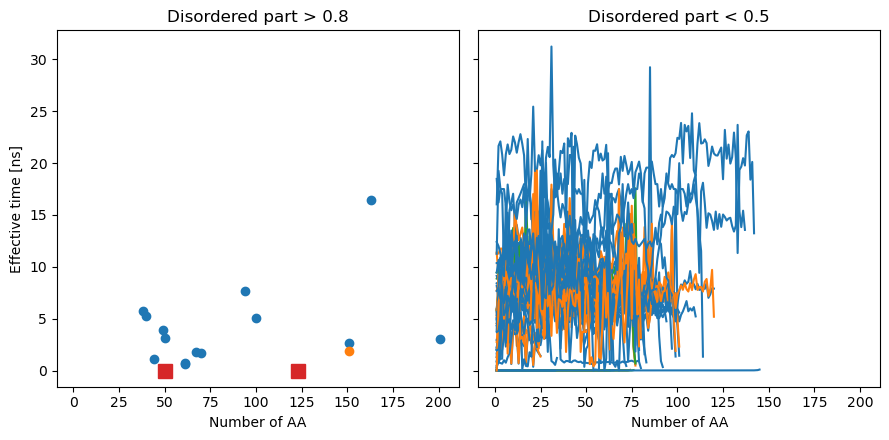

In [55]:
fig,ax=plt.subplots(1,2,sharey=True,sharex=True)
plt.rcParams["figure.figsize"] = [9, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 10})
fig.patch.set_facecolor('xkcd:white')


for entry in sorted_by_disordered:
    plot_secondary=False
    with open("../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/bmr"+entry+"/bmr"+entry+"_3.str") as f:
        for line in f:
            if "_Entity.Polymer_type" in line:
                if len(line.split())>1:
                    if "polypeptide" in line.split()[1]:
                        plot_secondary=True
    if disordered[entry]>0.8 and plot_secondary:
        i=0
        for field in experiments[entry]:
            try:
                effTimes=[]
                for R2 in experiments[entry][field]["results"]["R2"]:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                ax[0].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"o",c="C"+str(i))
                if np.mean(effTimes)>2.0*10**(-7):
                    print(entry)
                if entry=="50553" or entry=="16482":
                     ax[0].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"s",c="C3",markersize=10)
                i+=1
            except Exception as e:
                pass
    elif not disordered[entry]>0.8:
        break

ax[0].set_title("Disordered part > 0.8")
ax[0].set_xlabel("Number of AA")
ax[0].set_ylabel("Effective time [ns]")


for entry in sorted_by_disordered:
    plot_secondary=False
    with open("../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/bmr"+entry+"/bmr"+entry+"_3.str") as f:
        for line in f:
            if "_Entity.Polymer_type" in line:
                if len(line.split())>1:
                    if "polypeptide" in line.split()[1]:
                        plot_secondary=True
    if disordered[entry]<0.3 and plot_secondary:
        i=0
        for field in experiments[entry]:
            try:
                effTimes=[]
                for R2 in experiments[entry][field]["results"]["R2"]:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                ax[1].plot(residues,np.array(effTimes)*10**9,"-",c="C"+str(i))
                if np.mean(effTimes)>2.0*10**(-7):
                    print(entry)
                #if entry=="30834" or entry=="15930" or entry=="26788":
                #     ax[1].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"s",c="C3",markersize=10)
                i+=1
            except Exception as e:
                pass
    

ax[1].set_title("Disordered part < 0.5")
ax[1].set_xlabel("Number of AA")
#plt.savefig("length_vs_time.png")

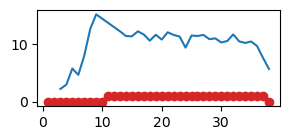

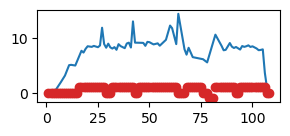

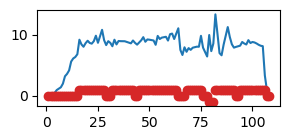

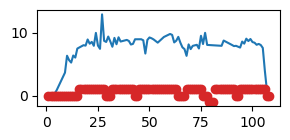

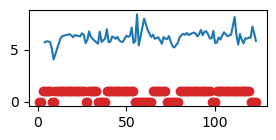

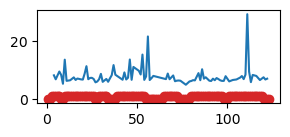

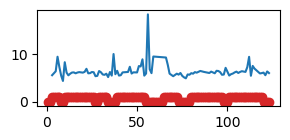

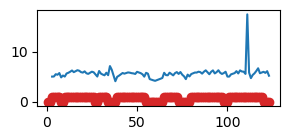

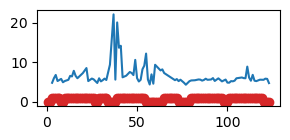

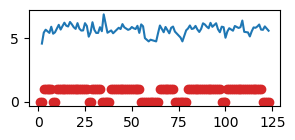

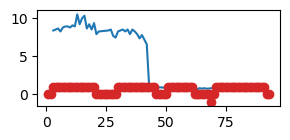

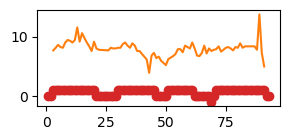

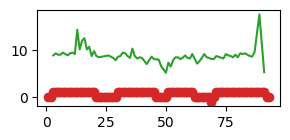

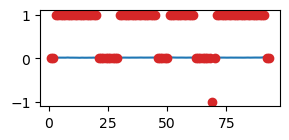

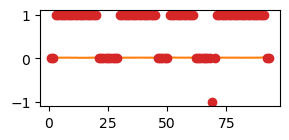

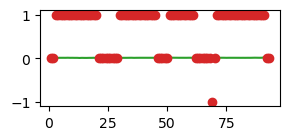

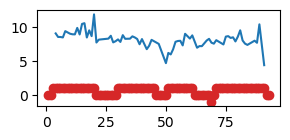

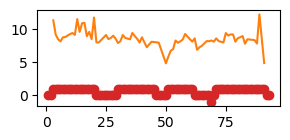

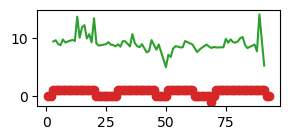

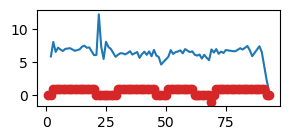

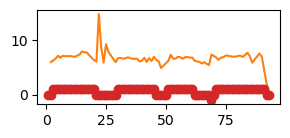

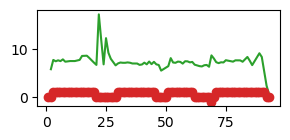

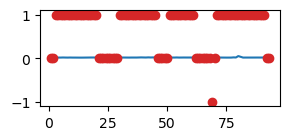

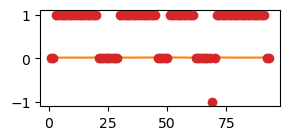

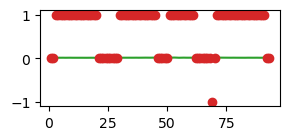

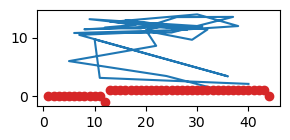

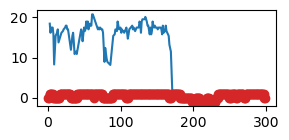

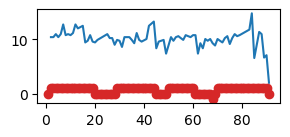

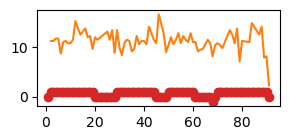

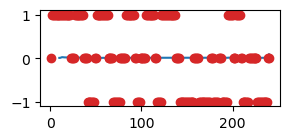

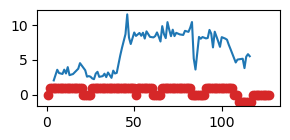

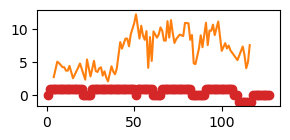

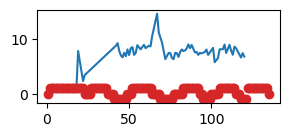

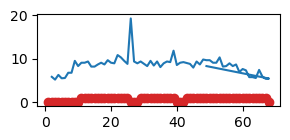

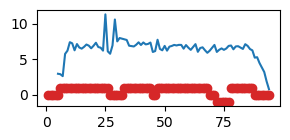

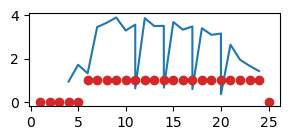

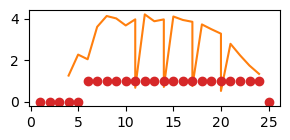

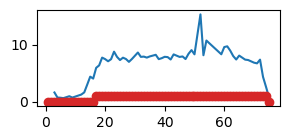

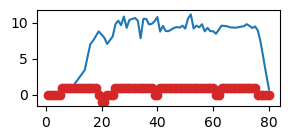

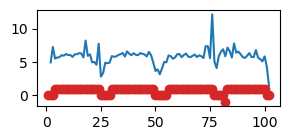

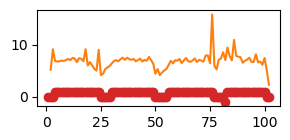

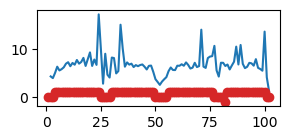

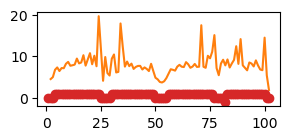

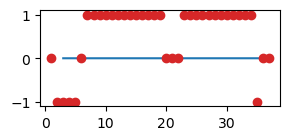

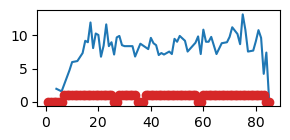

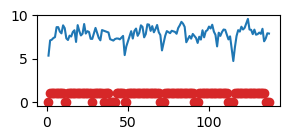

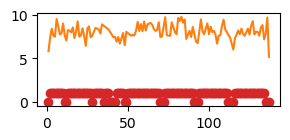

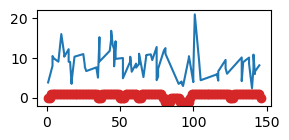

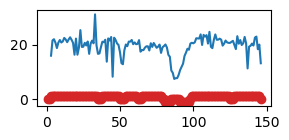

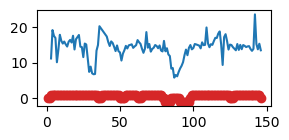

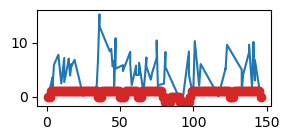

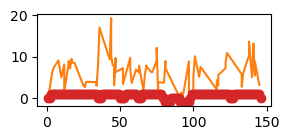

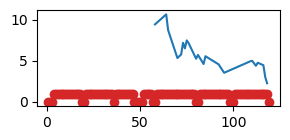

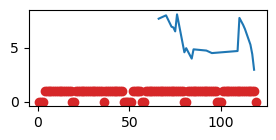

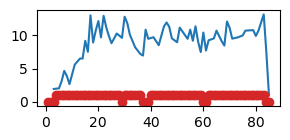

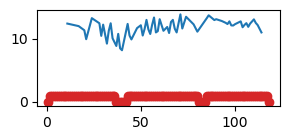

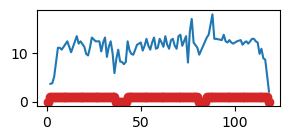

In [62]:
plt.rcParams["figure.figsize"] = [3, 1.5]
for entry in sorted_by_disordered:
    plot_secondary=False
    with open("../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/bmr"+entry+"/bmr"+entry+"_3.str") as f:
        for line in f:
            if "_Entity.Polymer_type" in line:
                if len(line.split())>1:
                    if "polypeptide" in line.split()[1]:
                        plot_secondary=True
    if disordered[entry]<0.3 and plot_secondary:
        i=0
        for field in experiments[entry]:
            try:
                effTimes=[]
                for R2 in experiments[entry][field]["results"]["R2"]:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                plt.plot(experiments[entry][field]["results"]["atomID"],np.array(effTimes)*10**9,"-",c="C"+str(i))
                plt.plot(secondary_structure[entry]["residues"],secondary_structure[entry]["codes"],"o",c="C3")
                plt.show()
                if np.mean(effTimes)>2.0*10**(-7):
                    print(entry)
                #if entry=="30834" or entry=="15930" or entry=="26788":
                #     ax[1].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"s",c="C3",markersize=10)
                i+=1
            except Exception as e:
                pass

In [21]:
disordered={}
for experiment in secondary_structure:
    procentage=secondary_structure[experiment]["codes"].count(0)/len(secondary_structure[experiment]["codes"])
    disordered[experiment]=procentage

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

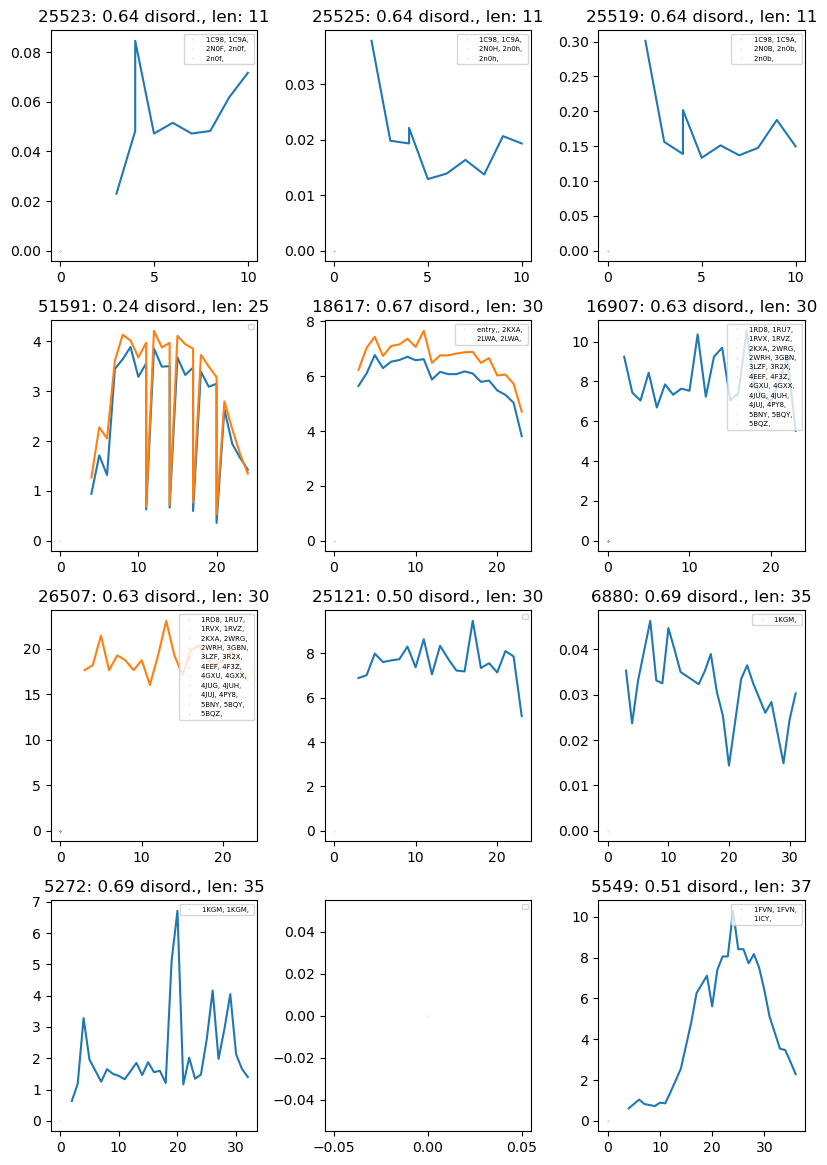

/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


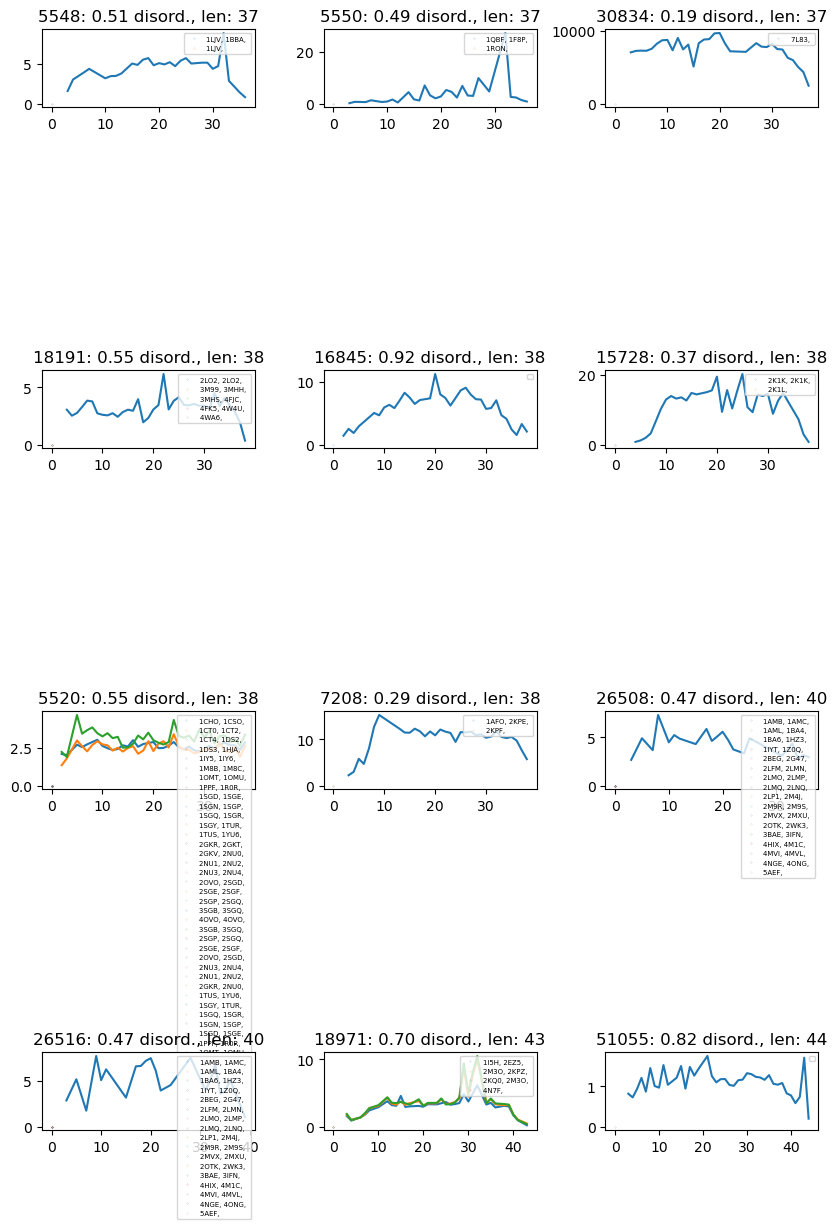

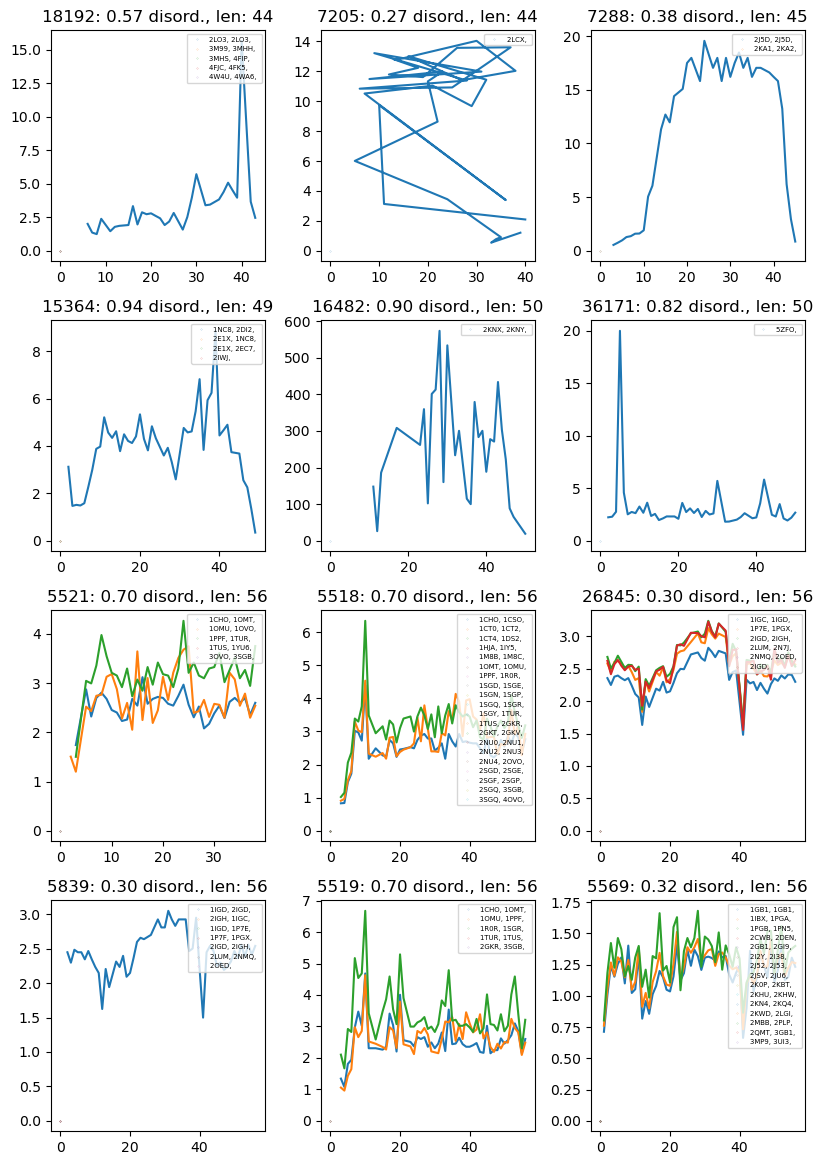

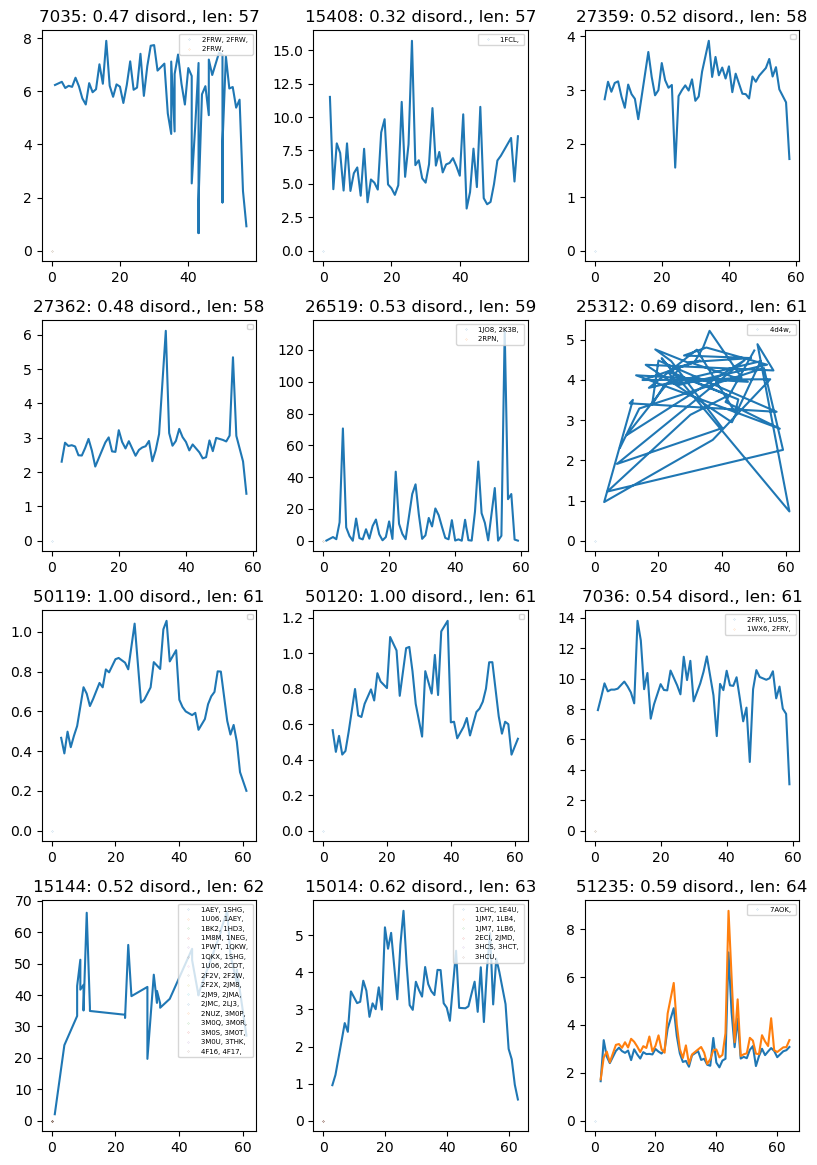

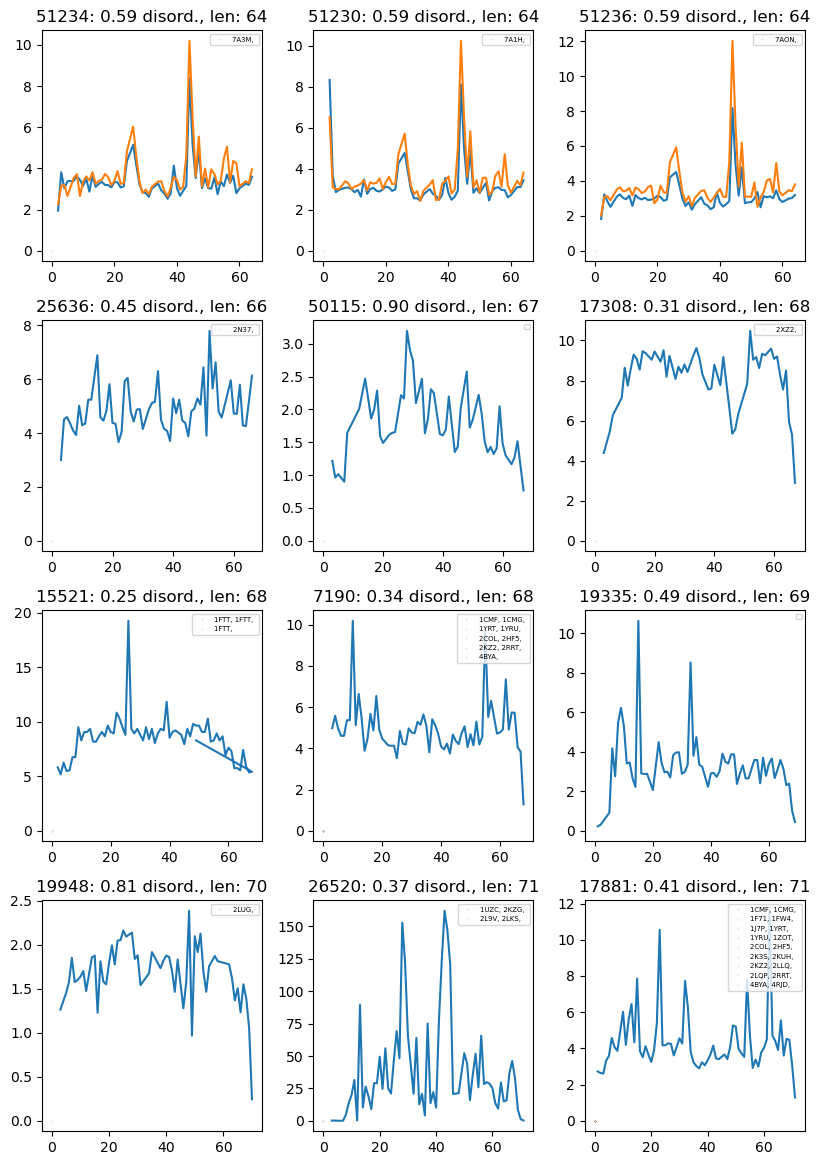

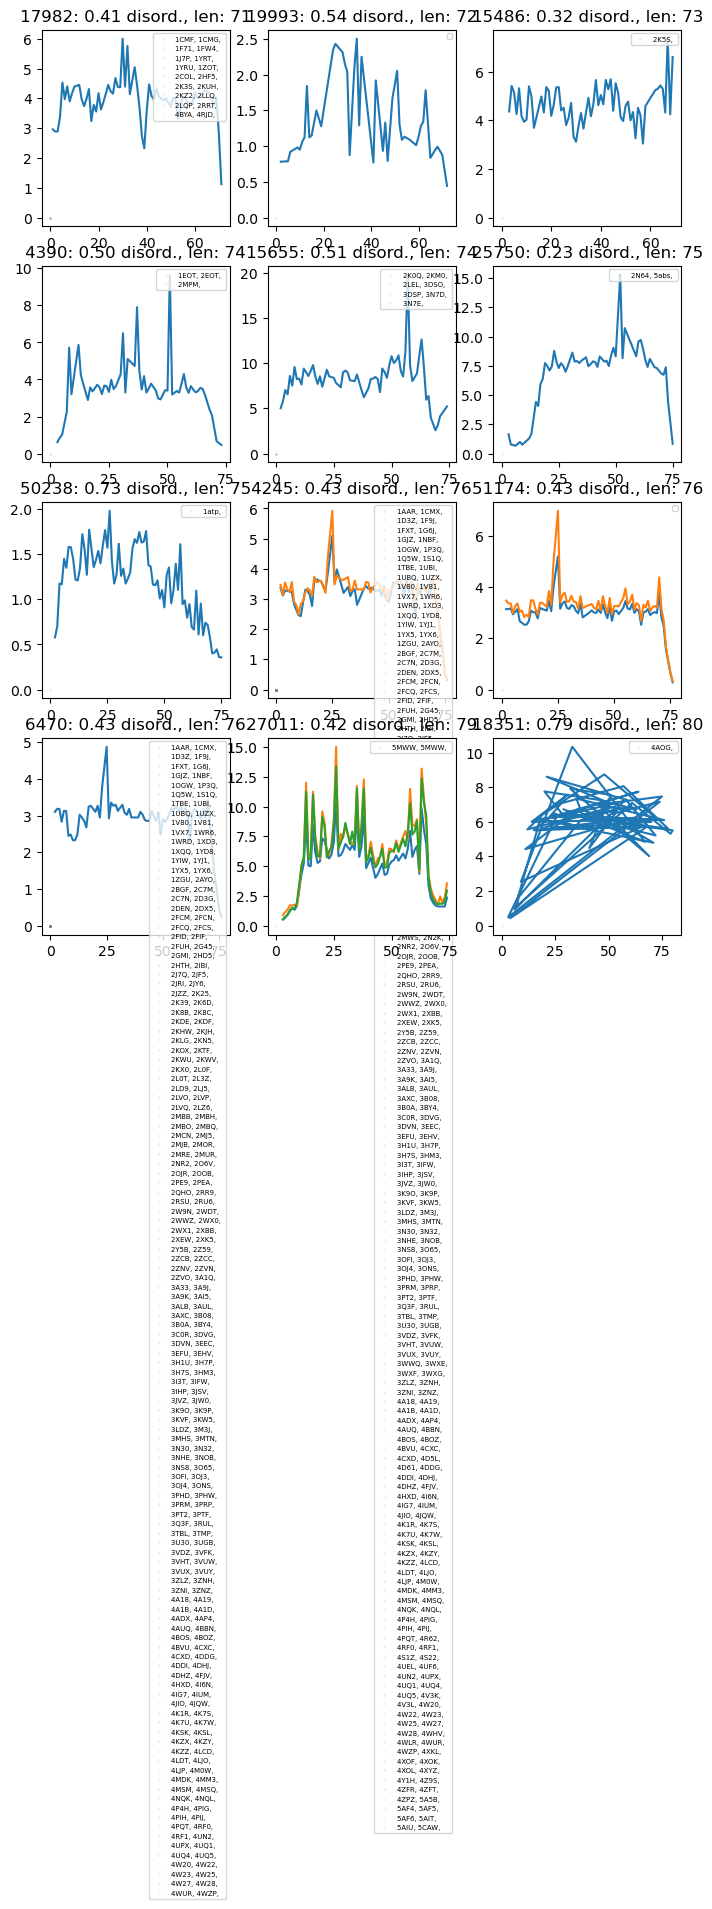

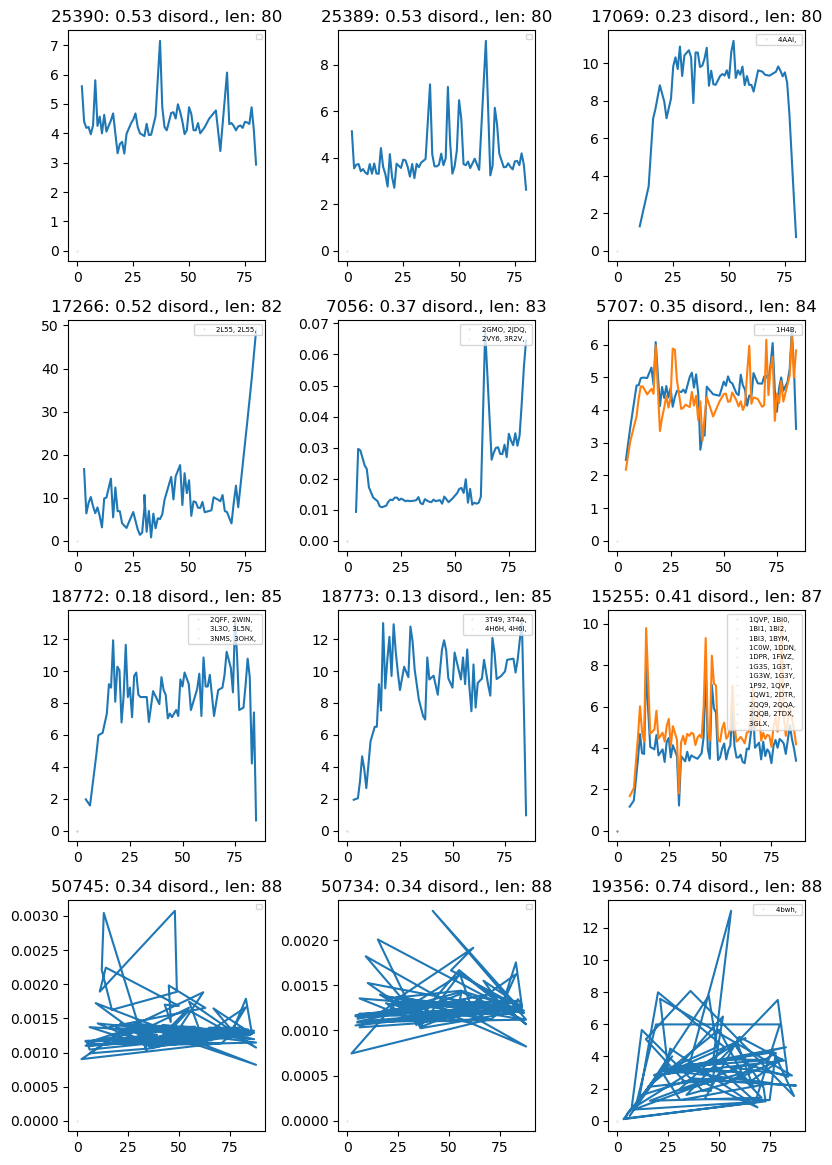

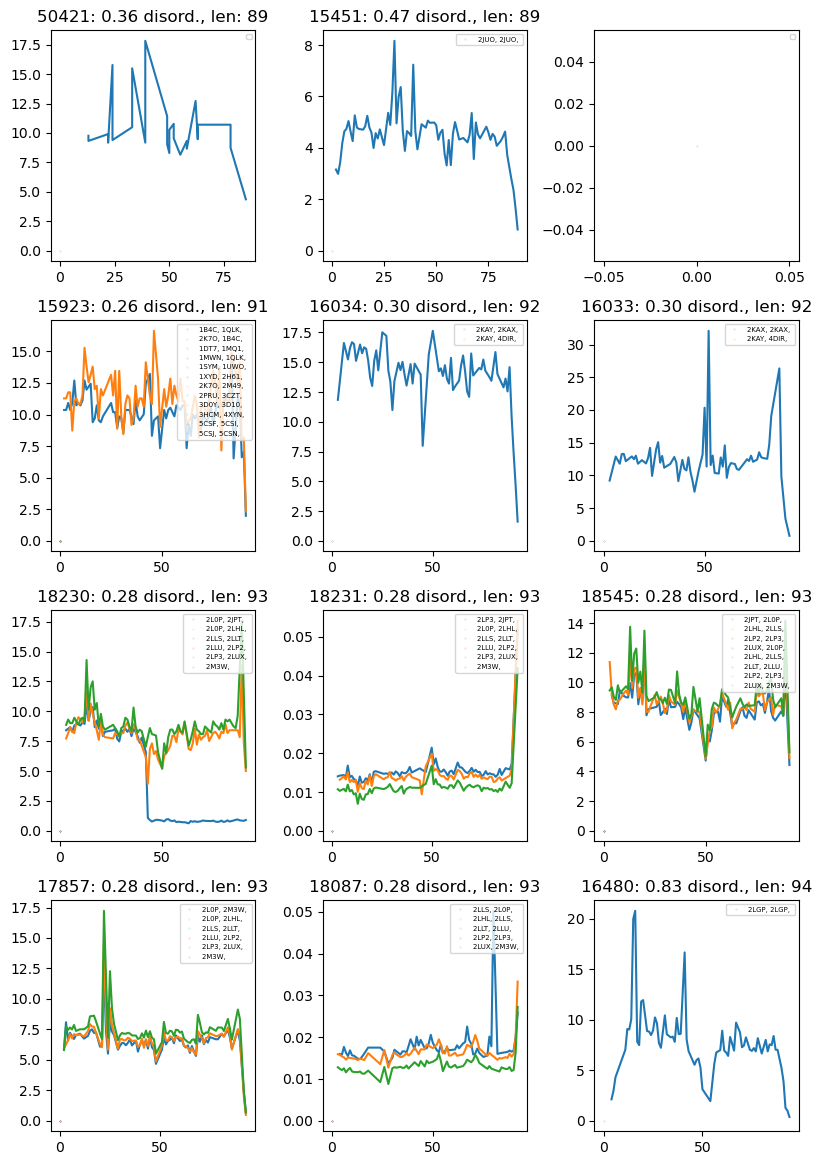

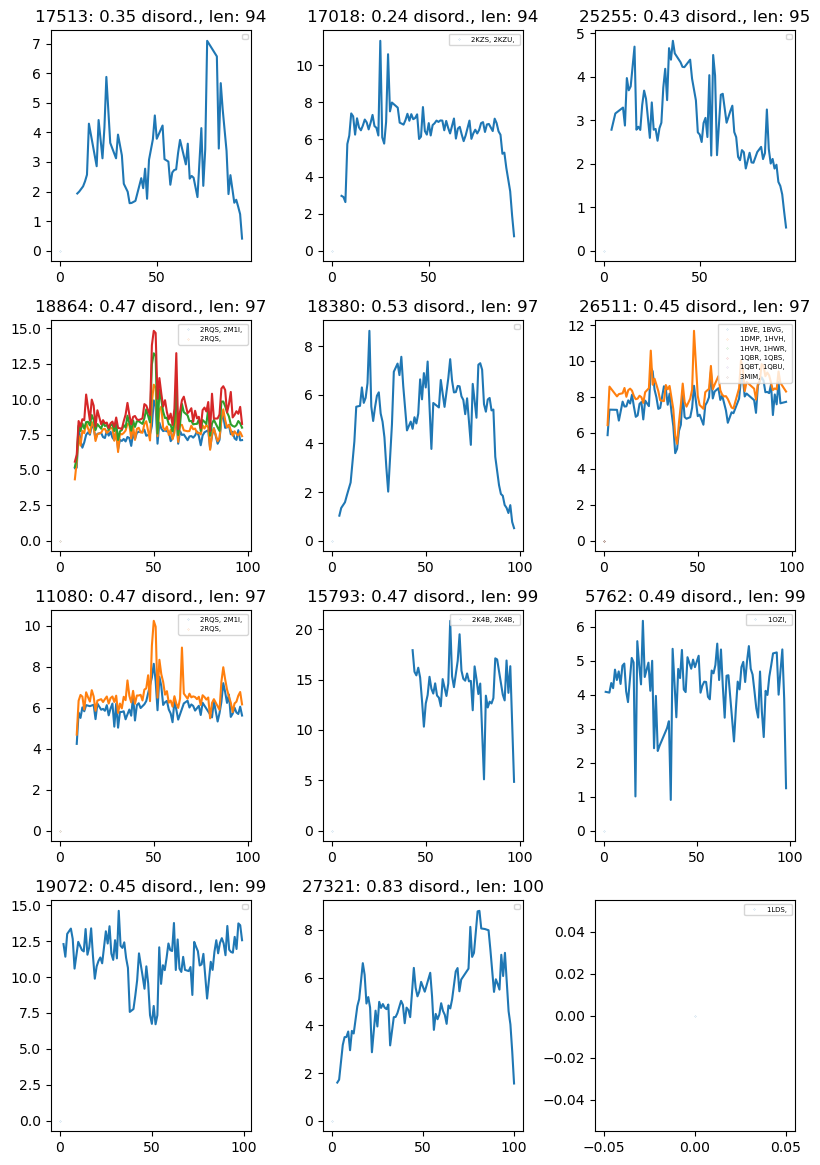

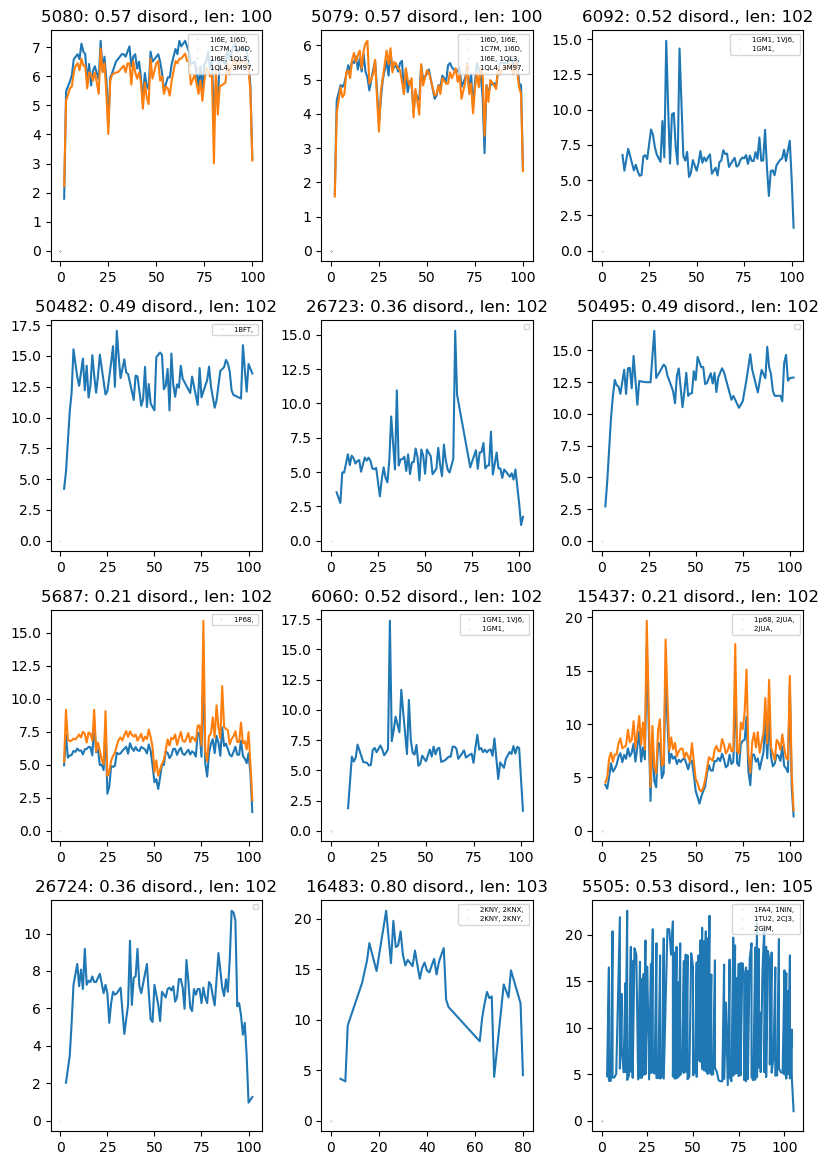

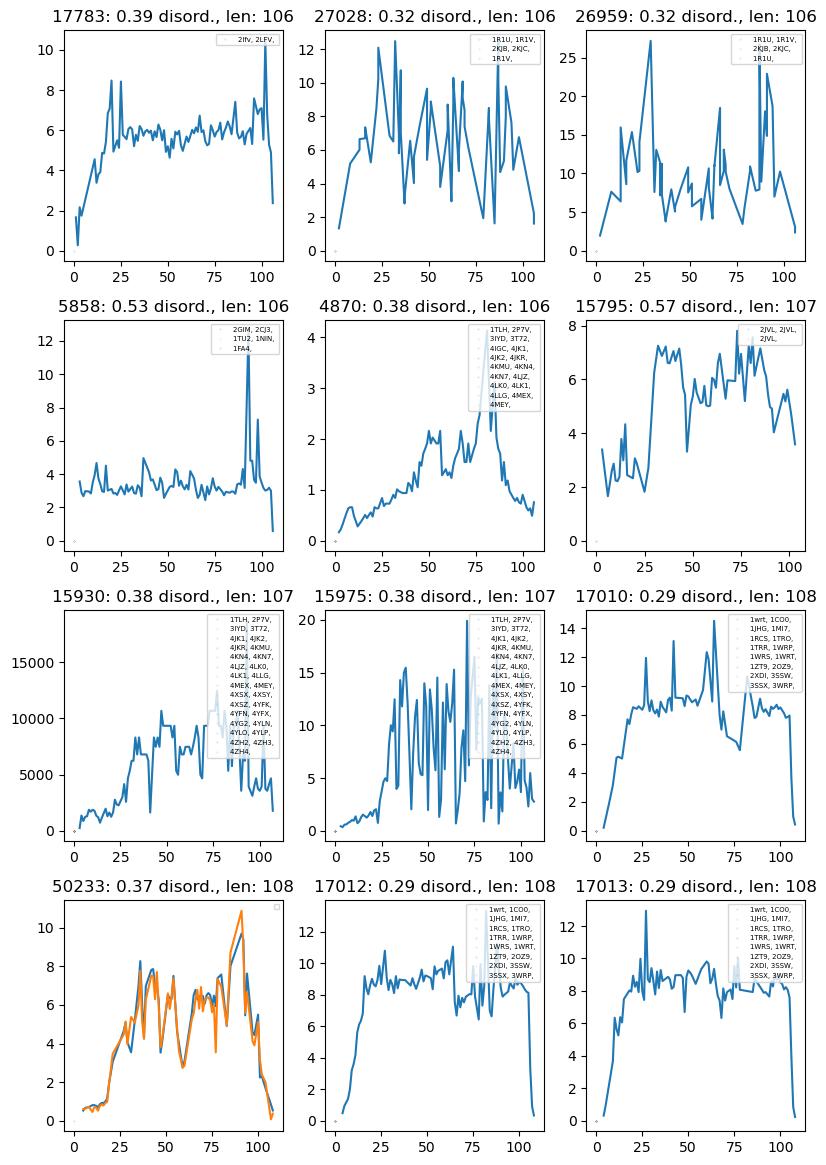

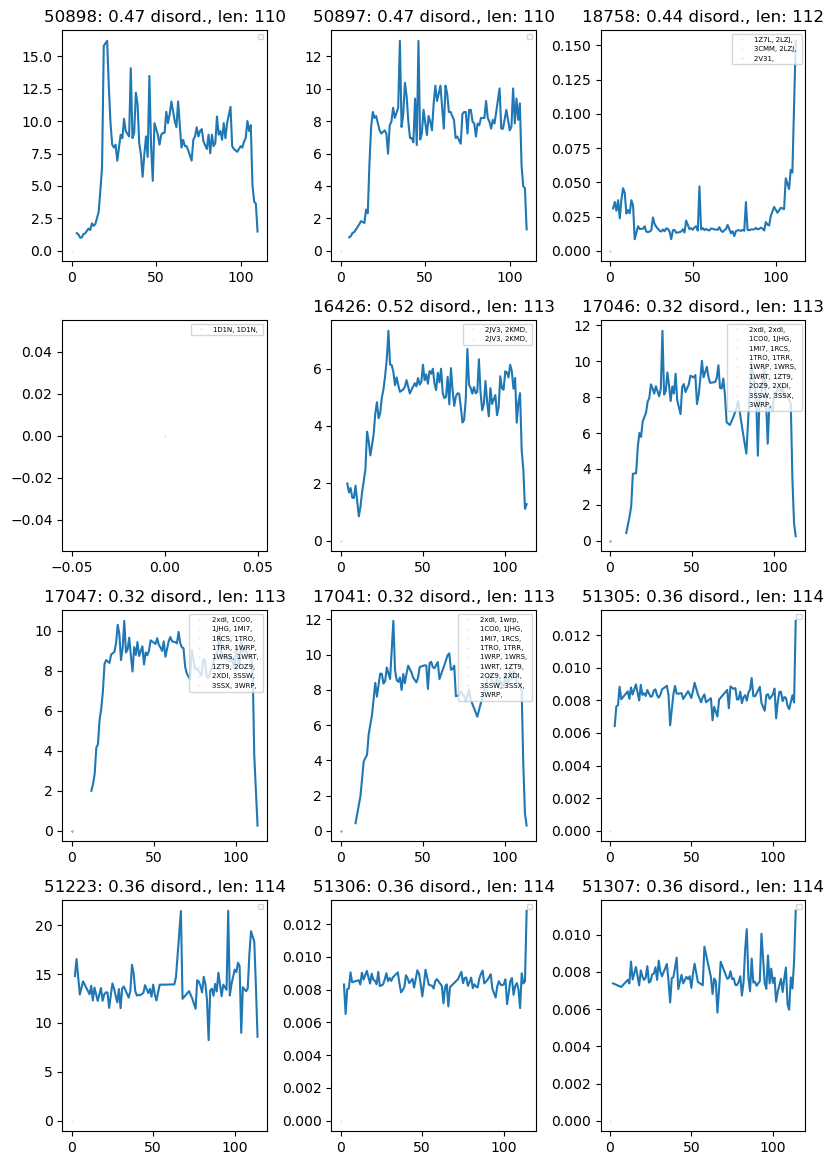

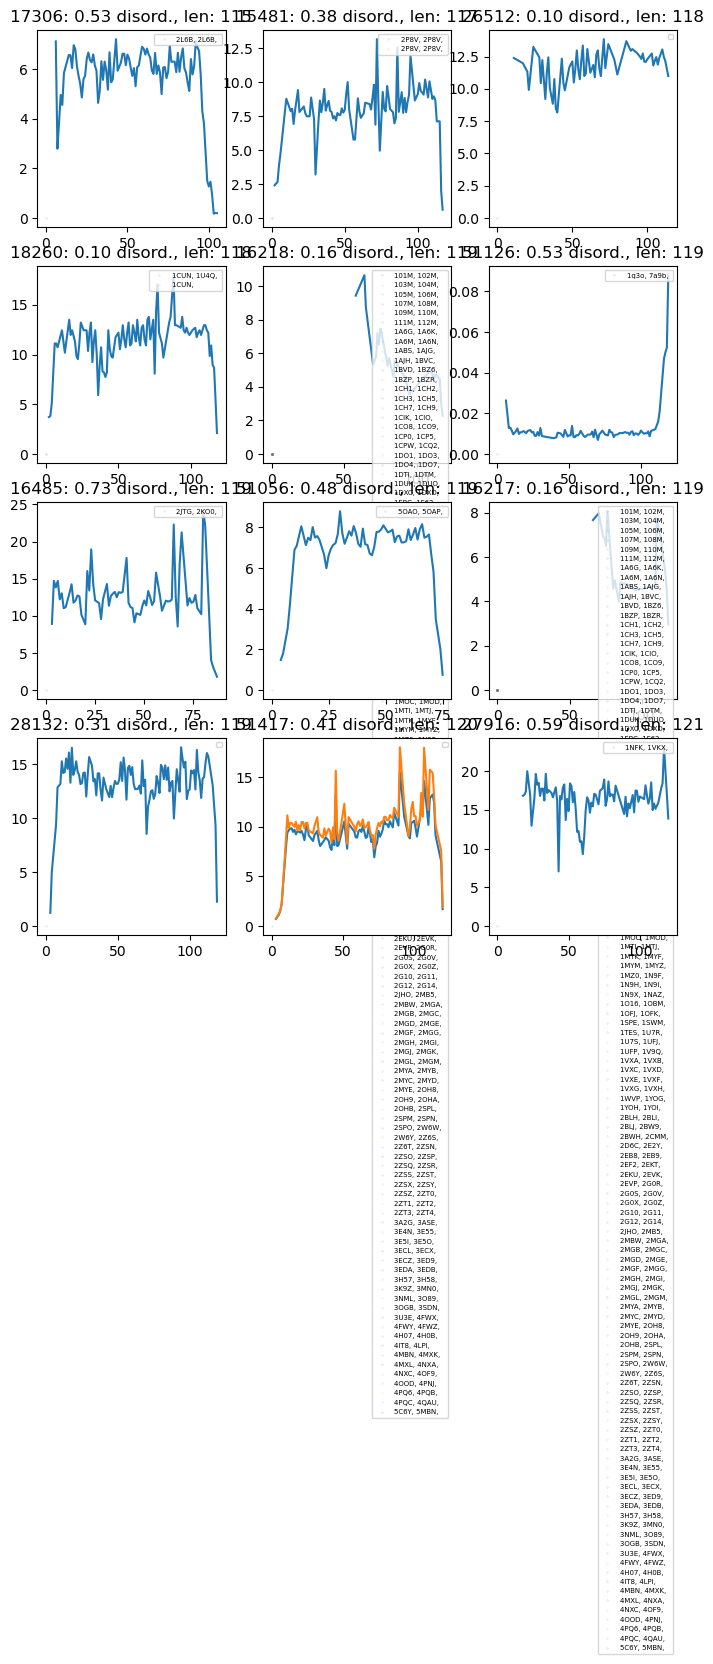

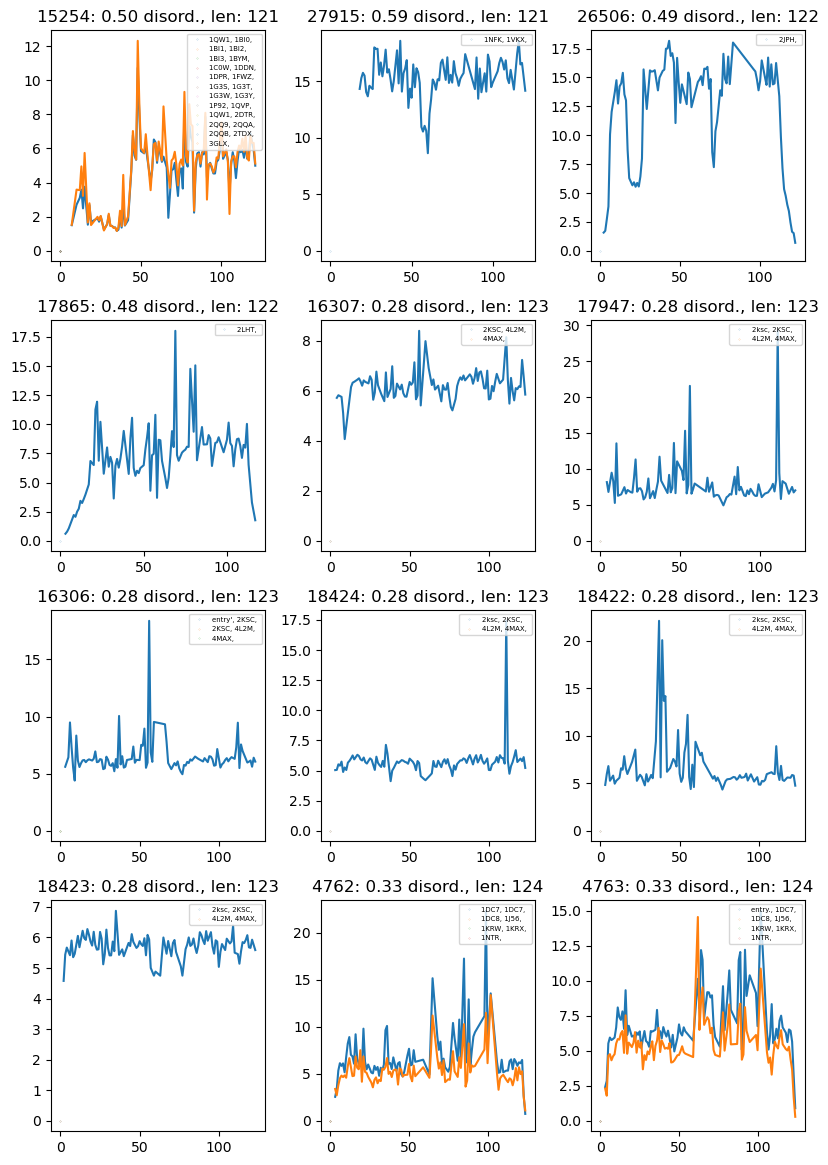

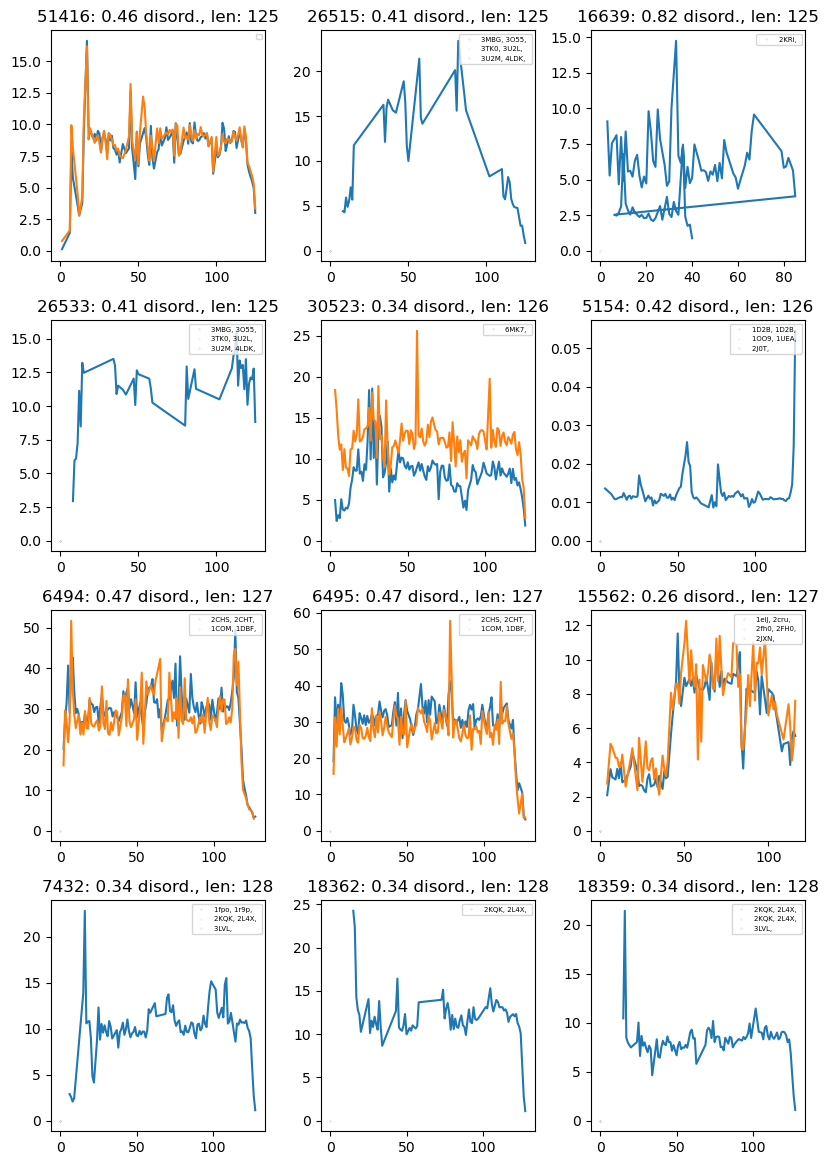

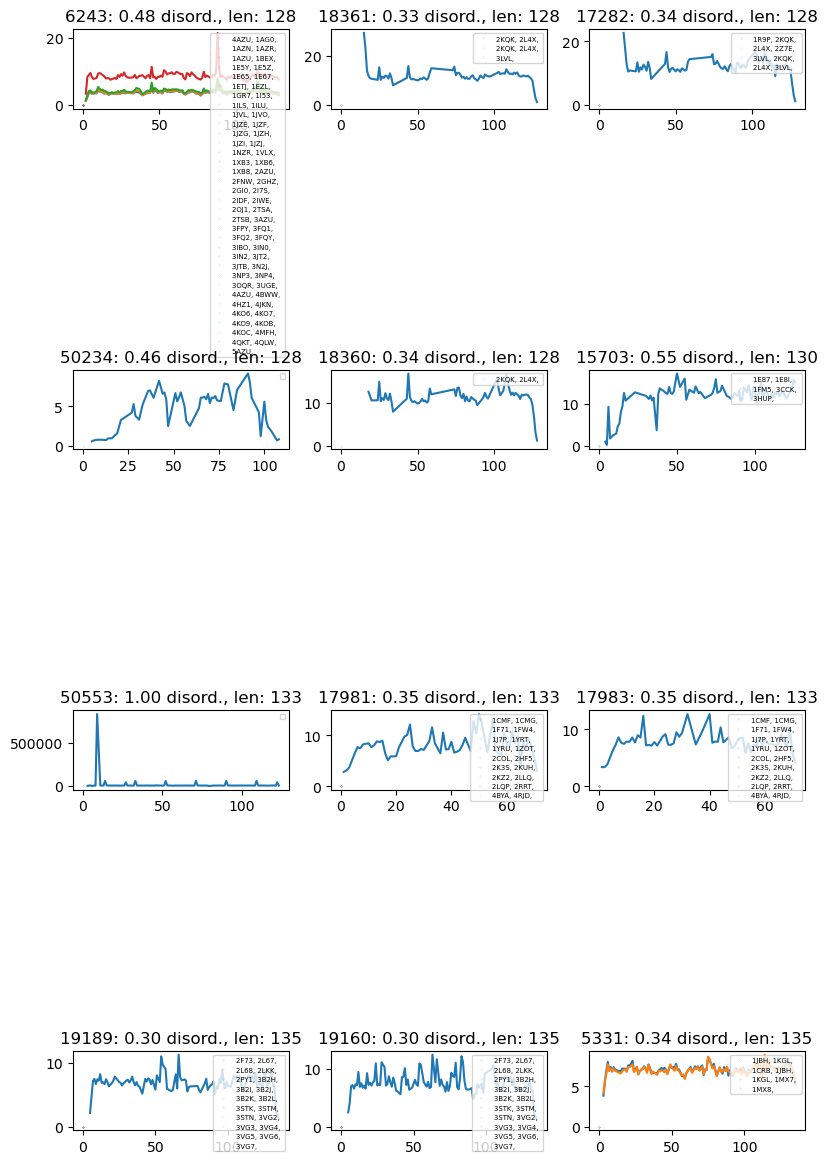

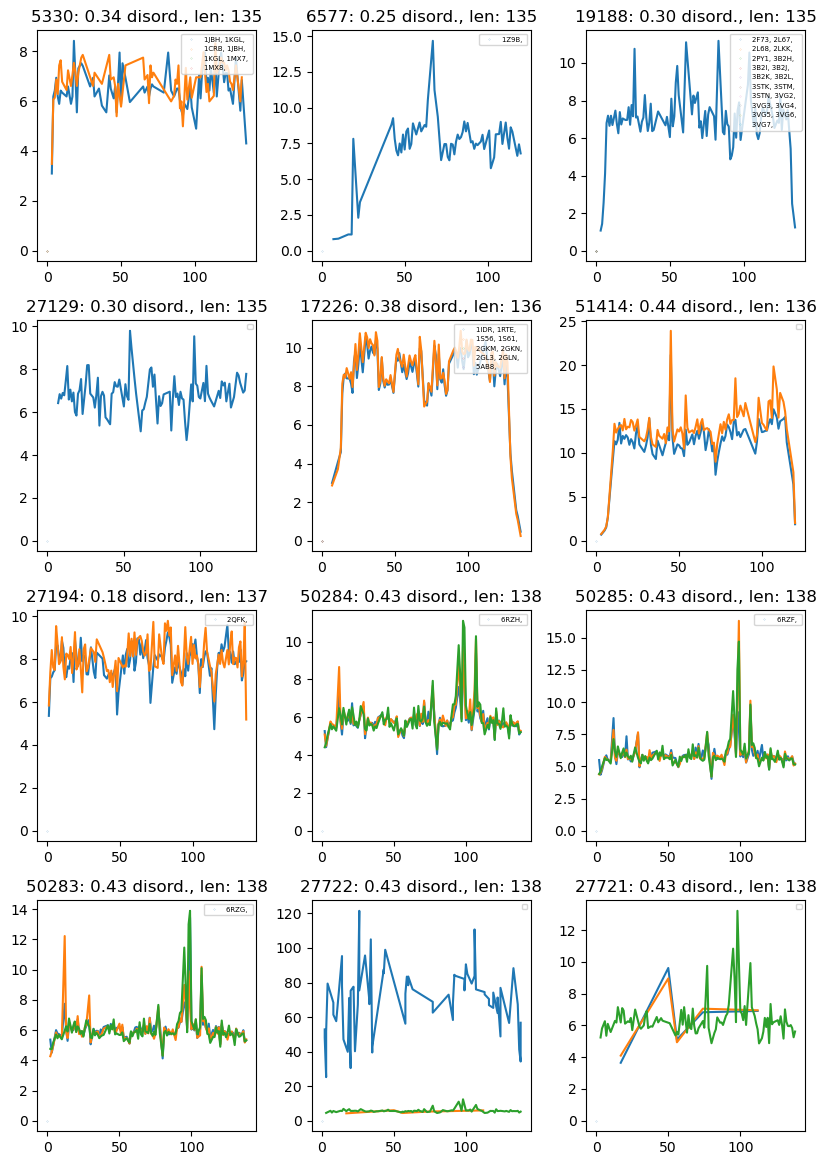

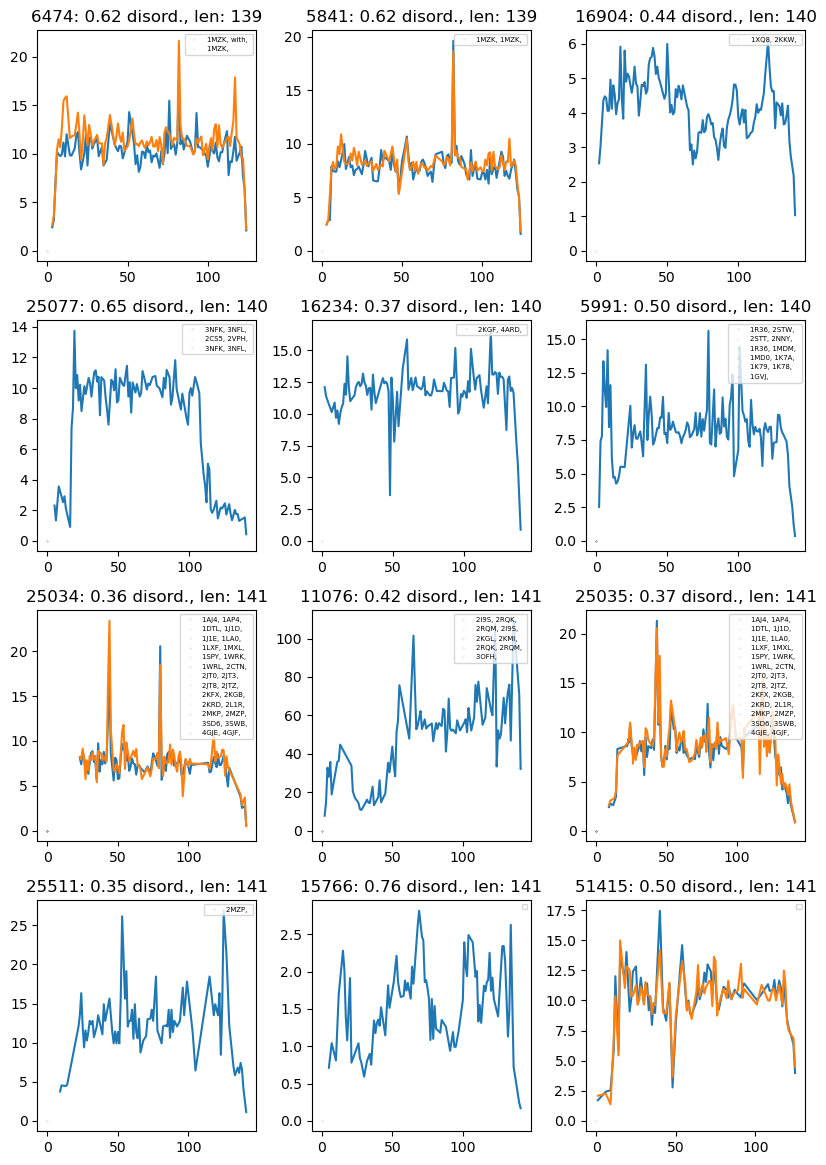

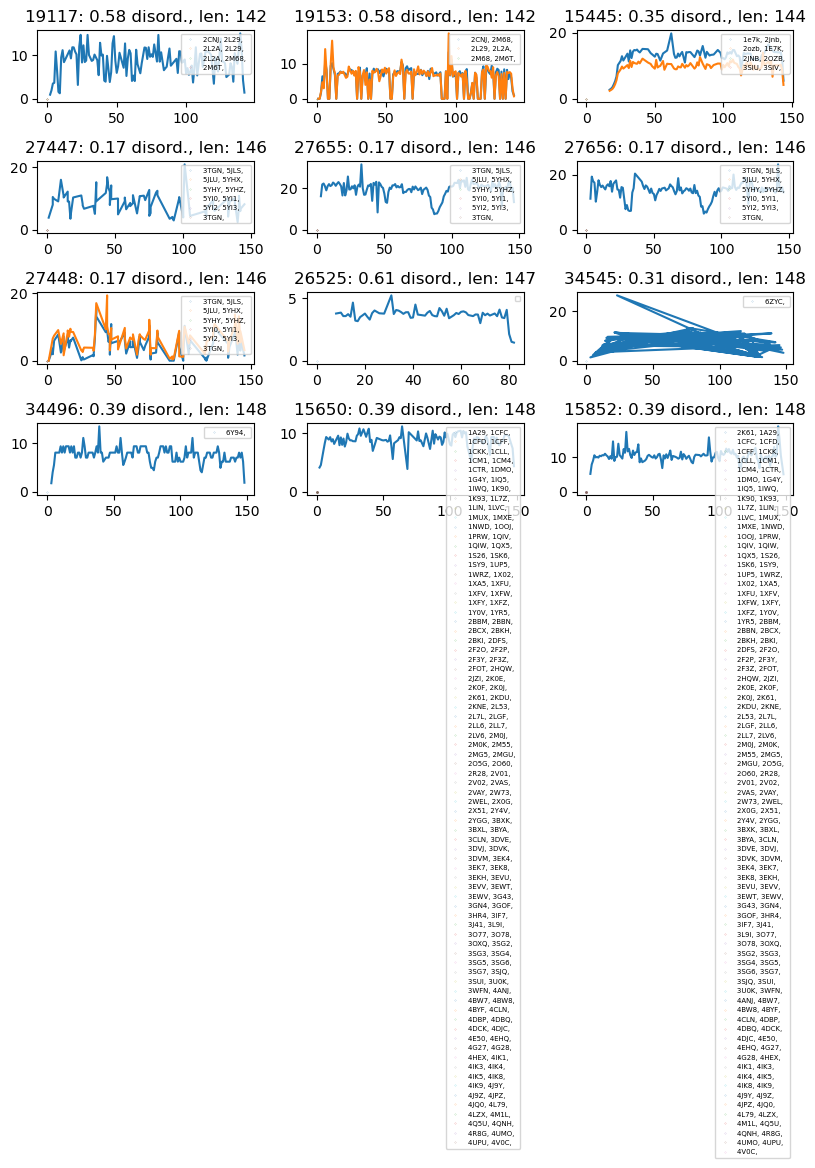

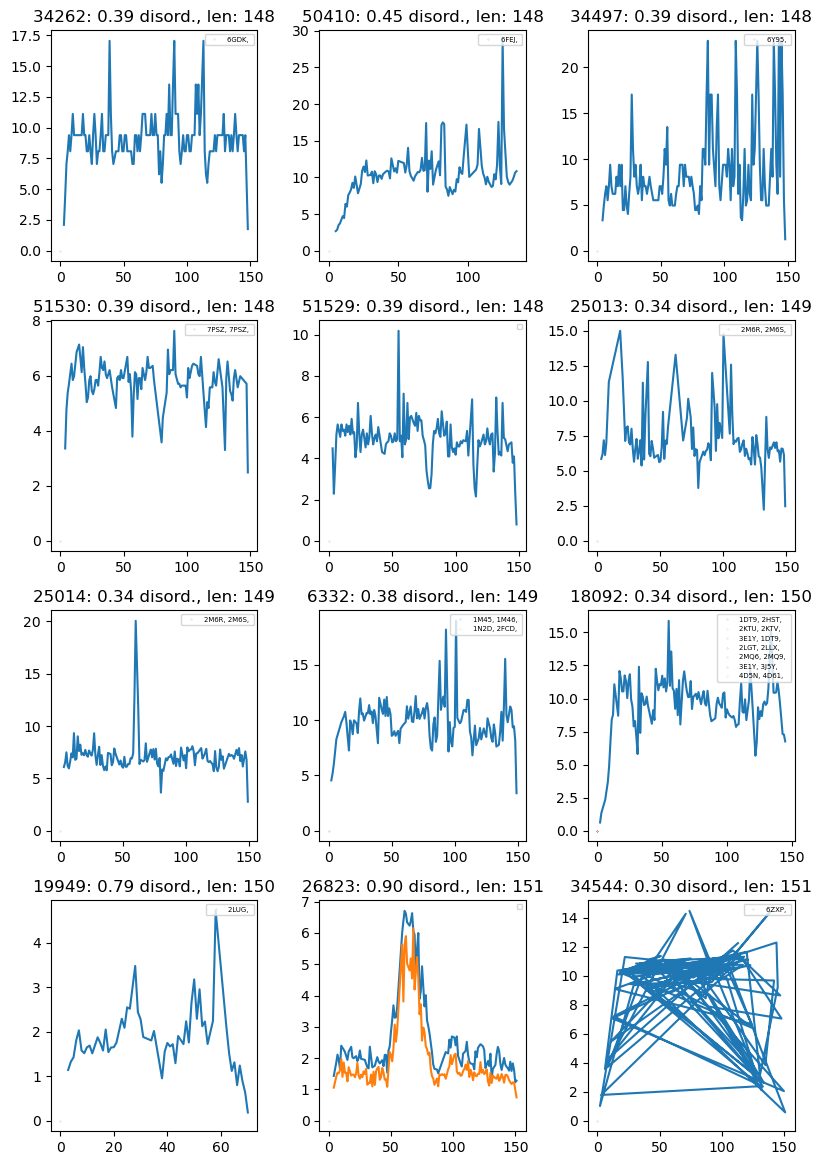

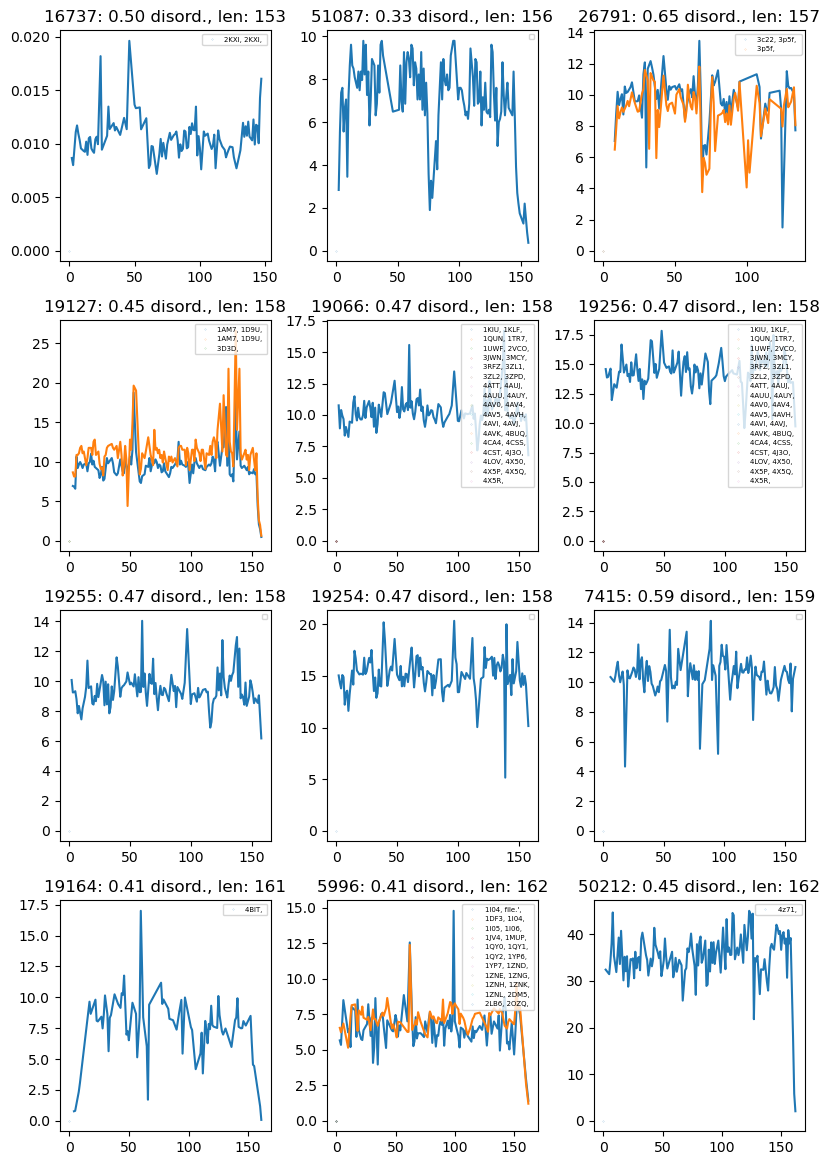

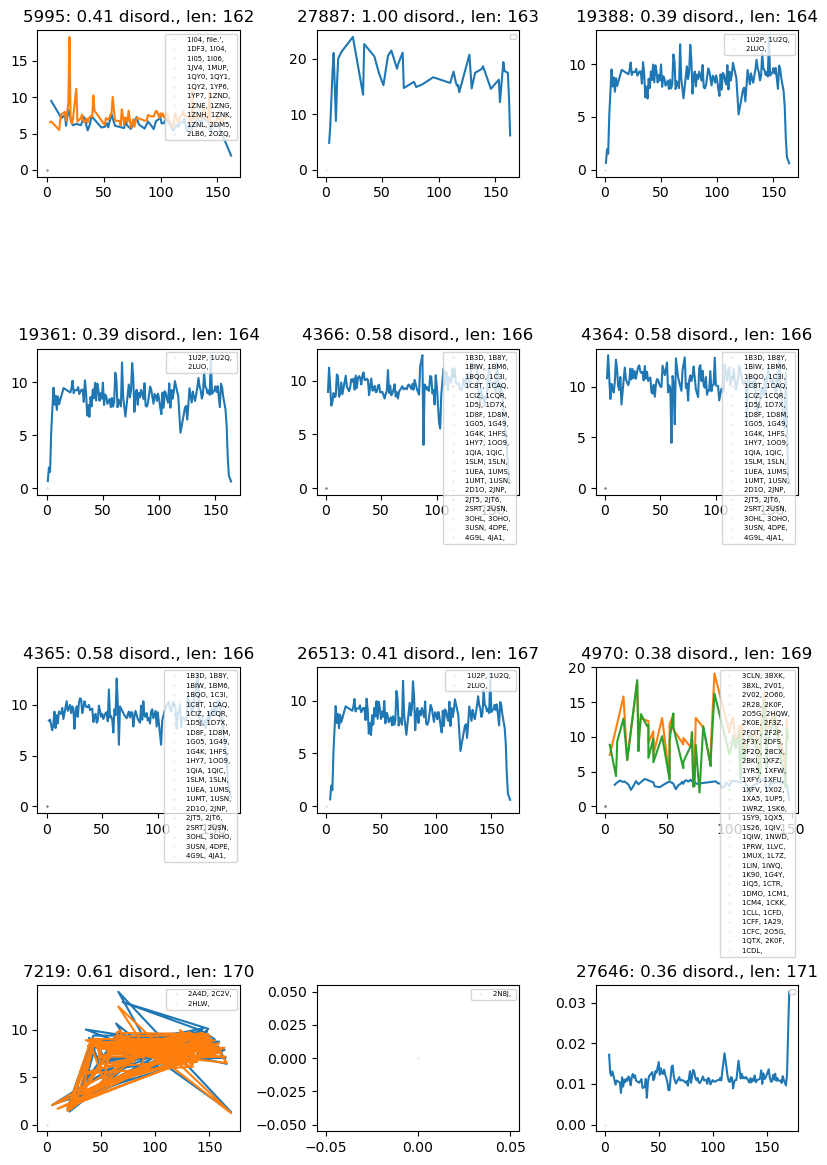

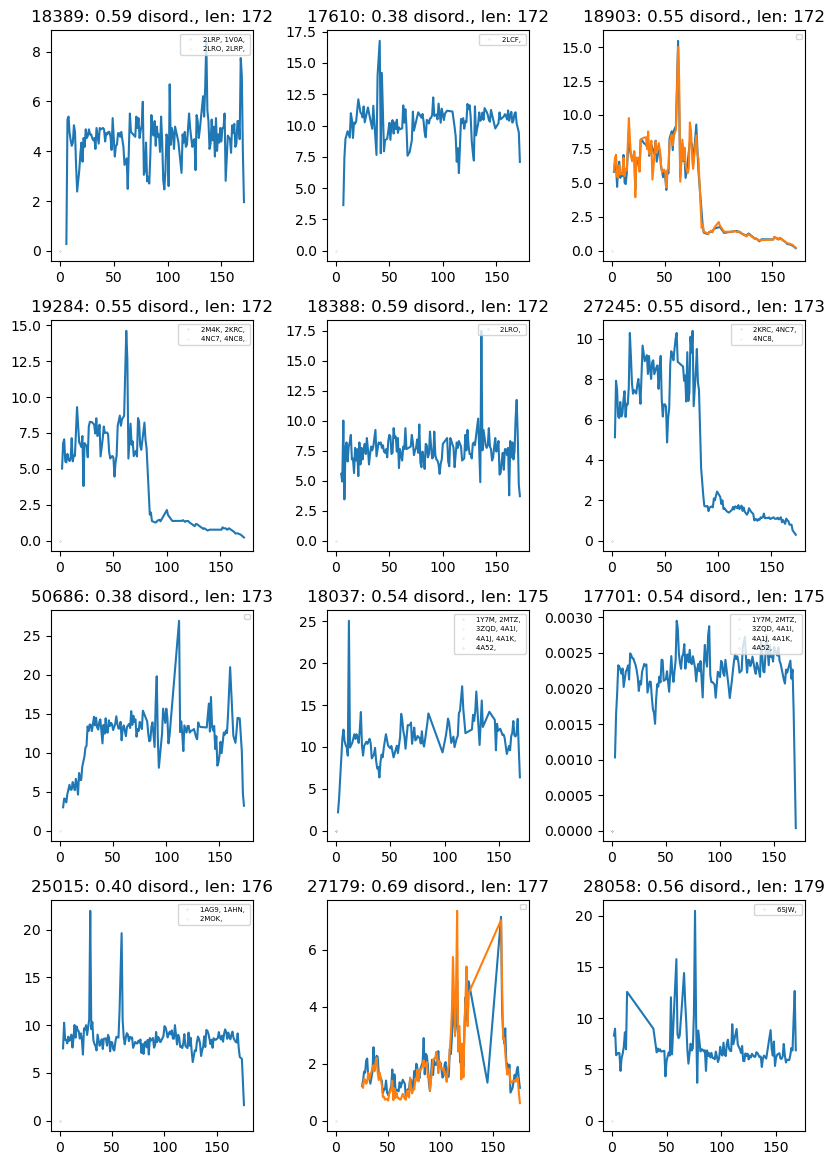

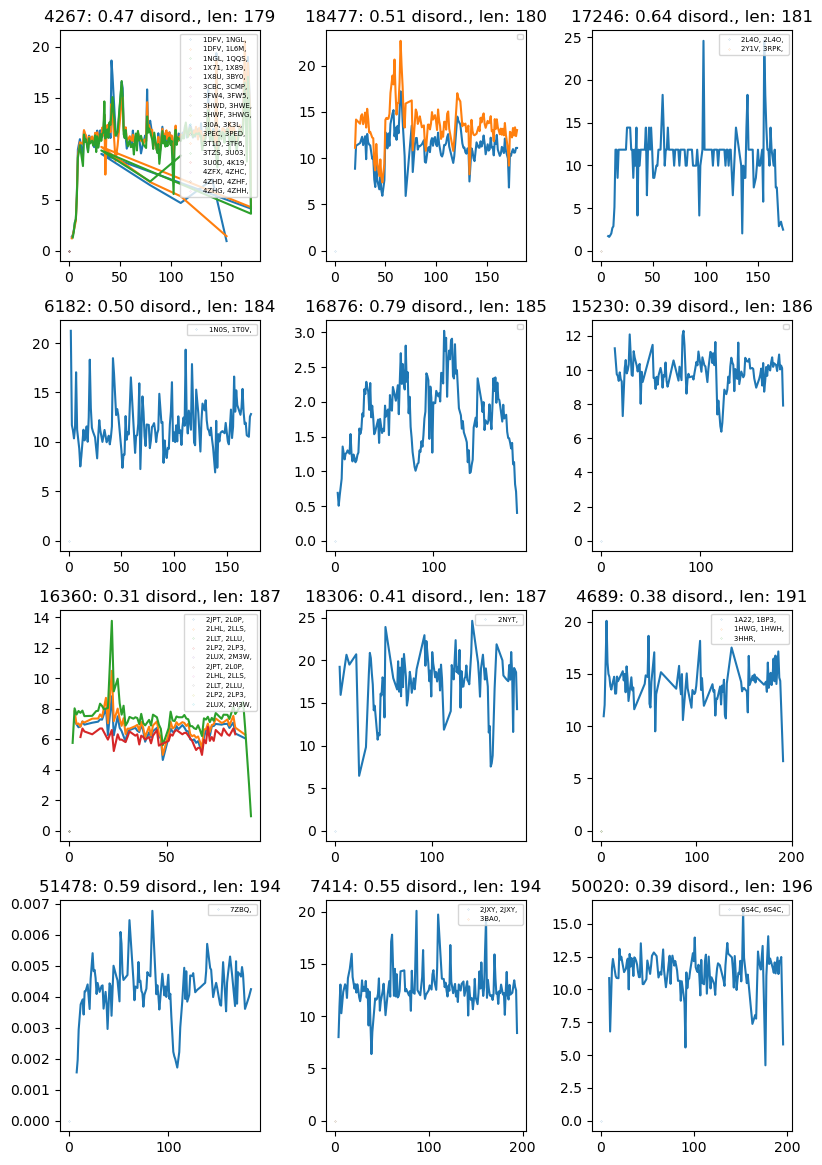

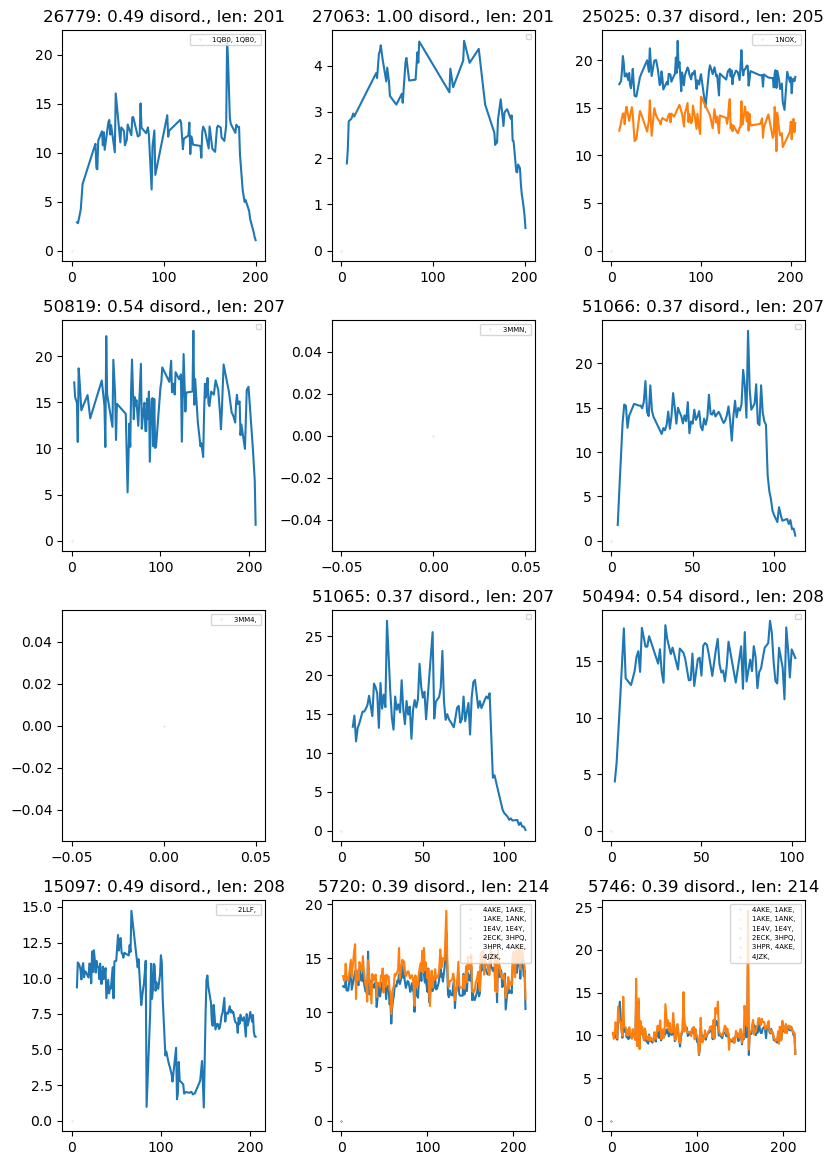

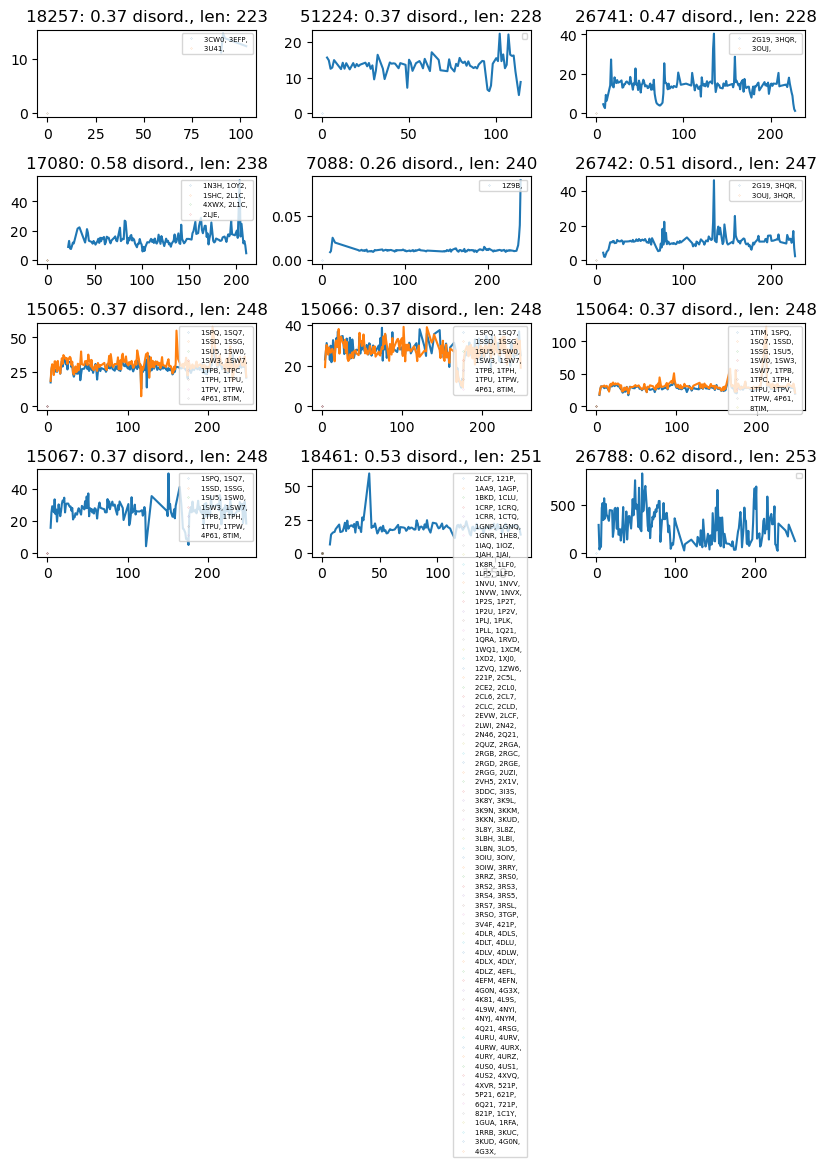

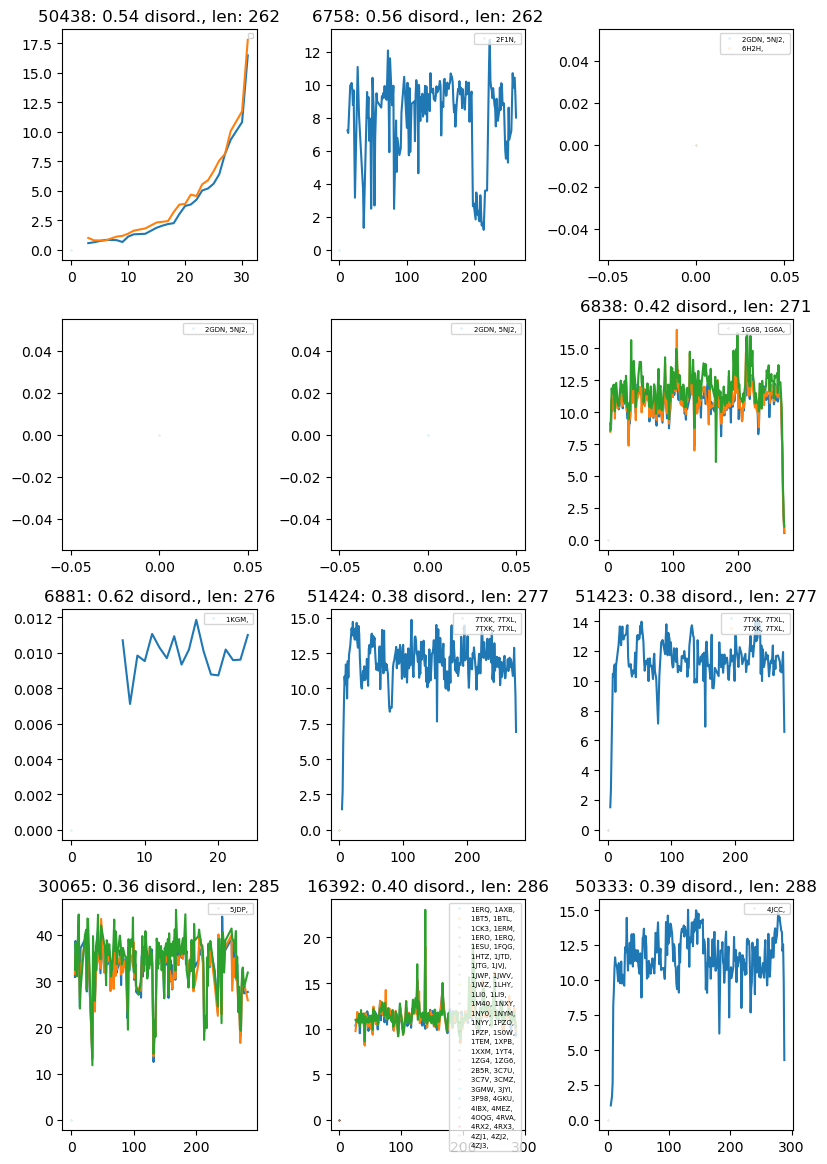

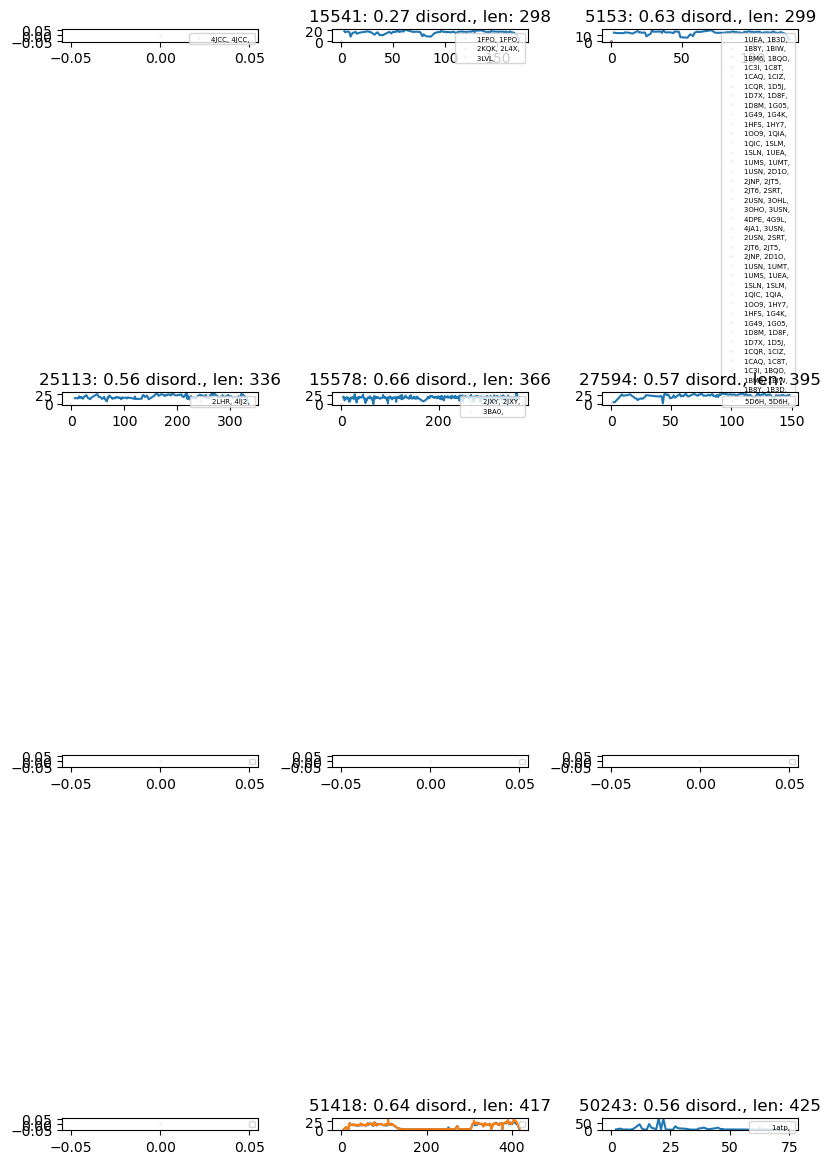

In [5]:
with PdfPages('relax_times_size_order.pdf') as pdf:
    
    plt.rcParams["figure.figsize"] = [8.25, 11.75]
    plt.rcParams["figure.autolayout"] = True
    fig, axs = plt.subplots(4, 3)
    j=0

    for entry in sorted_lengths:
        plot_secondary=False
        with open("../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/bmr"+entry+"/bmr"+entry+"_3.str") as f:
            for line in f:
                if "_Entity.Polymer_type" in line:
                    if len(line.split())>1:
                        if "polypeptide" in line.split()[1]:
                            plot_secondary=True
                            
        if disordered[entry]<1.3 and plot_secondary:
            text_position=len(secondary_structure[entry]["residues"])/3*2
            with open("../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/bmr"+entry+"/bmr"+entry+"_3.str") as f:
                pdb_codes=""
                offset2=0 
                for line in f:
                    if " PDB " in line:
                        for pos,value in enumerate(line.split()):
                            if value=="PDB":
                                if len(pdb_codes)>10:
                                    axs[int(j/3),np.mod(j,3)].plot(0,0,"o",markersize=0.1, label=pdb_codes)
                                    pdb_codes=""
                                    offset2+=1
                                pdb_codes+=(line.split()[pos+1])+", "

                        color="C3"

            axs[int(j/3),np.mod(j,3)].plot(0,0,"o",markersize=0.1, label=pdb_codes)
            axs[int(j/3),np.mod(j,3)].legend(loc=1,prop={"size":5})
            
            i=0
            for field in experiments[entry]:
                try:
                    effTimes=[]
                    for R2 in experiments[entry][field]["results"]["R2"]:
                        effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                    residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))

                    axs[int(j/3),np.mod(j,3)].plot(experiments[entry][field]["results"]["atomID"],np.array(effTimes)*10**9,"-",c="C"+str(i))
                    #axs[int(j/3),np.mod(j,3)].plot(secondary_structure[entry]["residues"],secondary_structure[entry]["codes"],"o",c="C3")
                    axs[int(j/3),np.mod(j,3)].set_title(f"{entry}: {disordered[entry]:.2f} disord., len: {lengths[entry]}")
                    i+=1
                except Exception as e:
                    pass
            j+=1
        if (j%12==0 and j!=0):
            j=0
            pdf.savefig()  # saves the current figure into a pdf page
            plt.rcParams["figure.figsize"] = [8.25, 11.75]
            plt.rcParams["figure.autolayout"] = True
            fig, axs = plt.subplots(4, 3)
    
    pdf.savefig()         
    plt.close()

In [258]:
partially_disordered={}
entries=['51418','19284','26823','25077','15254']
for entry in entries:
    partially_disordered[entry]={}
    partially_disordered[entry]["full"]={}
    partially_disordered[entry]["disordered"]={}
    for field in experiments[entry]['fields']:
        try:
            effTimes=[]
            for R2 in experiments[entry]['fields'][field]["results"]["R2"]:
                effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
            partially_disordered[entry]['full'][field]={}
            partially_disordered[entry]['full'][field]['residues']=experiments[entry]['fields'][field]["results"]["atomID"]
            partially_disordered[entry]['full'][field]['effTimes']=np.array(effTimes)*10**9
        except:
            pass
        
partially_disordered['EN2']={}
partially_disordered['EN2']['full']={}
partially_disordered['EN2']['full']['800']={}
partially_disordered['EN2']['full']['800']['residues']=[]
partially_disordered['EN2']['full']['800']['effTimes']=[]
with open('EN2_R2_exp.dat','r') as file:
    for line in file:
        partially_disordered['EN2']['full']['800']['residues'].append(int(line.split()[0]))
        partially_disordered['EN2']['full']['800']['effTimes'].append(srt.find_tau_from_R2_np_poly1d(800,float(line.split()[1]))*10**9)
        
partially_disordered['tonB']={}
partially_disordered['tonB']['full']={}
partially_disordered['tonB']['full']['850']={}
partially_disordered['tonB']['full']['850']['residues']=[]
partially_disordered['tonB']['full']['850']['effTimes']=[]
with open('tonB_experimentalDATAT1T2NOE.dat','r') as file:
    for line in file:
        if '%' in line:
            pass
        elif not len(line.split())==7:
            pass
        elif not line.split()[3]=='nan':
            partially_disordered['tonB']['full']['850']['residues'].append(int(line.split()[0]))
            partially_disordered['tonB']['full']['850']['effTimes'].append(srt.find_tau_from_R2_np_poly1d(850,1/float(line.split()[3]))*10**9)        

In [274]:
#foramt: ID: [structured, disordered, magnetic field]
entries={'51418':[[(5,82),(138,-1)],[(83,128),(129,137)],'800'],
         '19284':[[(0,68)],[(68,-1)],'600'],
         '26823':[[(41,51)],[(0,34),(65,-1)],'850'],
         '25077':[[(8,78)],[(85,-1)],'599.427'],
         '15254':[[(26,-1)],[(8,23)],'720'],
         'EN2':[[(24,30),(57,-5)],[(0,19),(34,52)],'800'],
         'tonB':[[(52,-2)],[(0,51)],'850']}

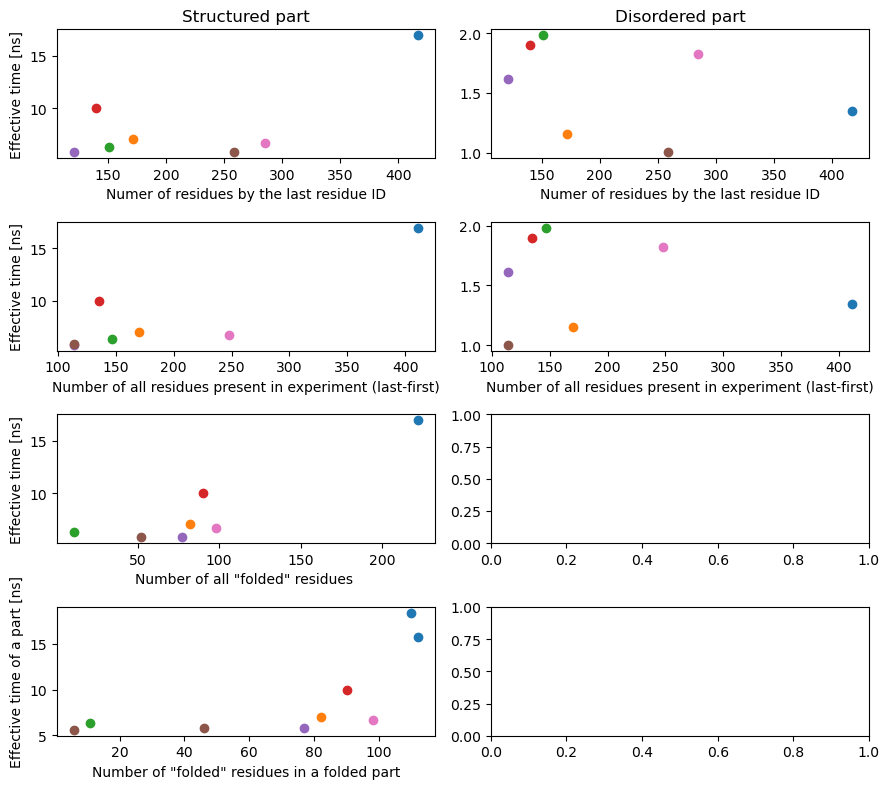

In [290]:
fig, axs = plt.subplots(4,2,figsize=(9,8),sharey=False)
i=0
for entry,data in entries.items():
    structured=[]
    disordered=[]
    field=data[2]
    structured_length=0
    for indexes in data[0]:
        structured+=list(partially_disordered[entry]['full'][field]['effTimes'][indexes[0]:indexes[1]])
       
        structured_length+=partially_disordered[entry]['full'][field]['residues'][indexes[1]]-partially_disordered[entry]['full'][field]['residues'][indexes[0]]
        axs[3,0].plot(partially_disordered[entry]['full'][field]['residues'][indexes[1]]-partially_disordered[entry]['full'][field]['residues'][indexes[0]],np.mean(list(partially_disordered[entry]['full'][field]['effTimes'][indexes[0]:indexes[1]])),'o',c='C'+str(i))
    
    for indexes in data[1]:
        disordered+=list(partially_disordered[entry]['full'][field]['effTimes'][indexes[0]:indexes[1]])
    #print(np.mean(structured),np.mean(disordered))
    axs[0,0].plot(partially_disordered[entry]['full'][field]['residues'][-1],np.mean(structured),'o')
    axs[0,1].plot(partially_disordered[entry]['full'][field]['residues'][-1],np.mean(disordered),'o')
    axs[1,0].plot(partially_disordered[entry]['full'][field]['residues'][-1]-partially_disordered[entry]['full'][field]['residues'][0],np.mean(structured),'o')
    axs[1,1].plot(partially_disordered[entry]['full'][field]['residues'][-1]-partially_disordered[entry]['full'][field]['residues'][0],np.mean(disordered),'o')
    axs[2,0].plot(structured_length,np.mean(structured),'o')
    
    i+=1
axs[0,0].set_title('Structured part')
axs[0,1].set_title('Disordered part')


axs[0,0].set_xlabel('Numer of residues by the last residue ID')
axs[0,1].set_xlabel('Numer of residues by the last residue ID')

axs[0,0].set_ylabel('Effective time [ns]')
axs[1,0].set_ylabel('Effective time [ns]')
axs[2,0].set_ylabel('Effective time [ns]')
axs[3,0].set_ylabel('Effective time of a part [ns]')                    

axs[1,0].set_xlabel('Number of all residues present in experiment (last-first)')
axs[1,1].set_xlabel('Number of all residues present in experiment (last-first)')

axs[2,0].set_xlabel('Number of all "folded" residues ')
axs[3,0].set_xlabel('Number of "folded" residues in a folded part')
plt.savefig('partially_disordered_vs_size.pdf')

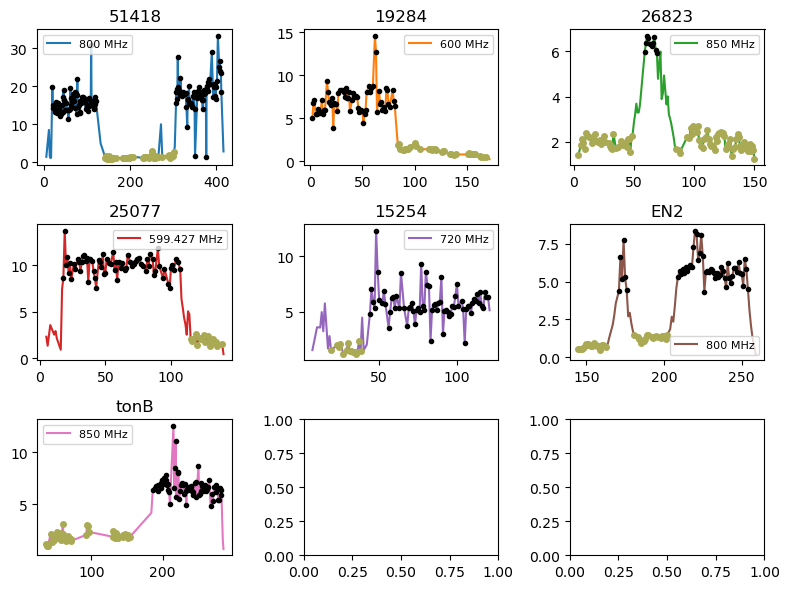

In [289]:
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(3,3,figsize=(8,6))
for i,entry in enumerate(partially_disordered):
    field=entries[entry][2]
    axs[i//3,i%3].plot(partially_disordered[entry]['full'][field]['residues'],partially_disordered[entry]['full'][field]['effTimes'],label=field+' MHz',c='C'+str(i))
    for limits in entries[entry][0]:
        beg=limits[0]
        end=limits[1]
        axs[i//3,i%3].plot(partially_disordered[entry]['full'][field]['residues'][beg:end],partially_disordered[entry]['full'][field]['effTimes'][beg:end],'.',c='black')
    
    for limits in entries[entry][1]:
        beg=limits[0]
        end=limits[1]
        axs[i//3,i%3].plot(partially_disordered[entry]['full'][field]['residues'][beg:end],partially_disordered[entry]['full'][field]['effTimes'][beg:end],'.',markersize=8,c='#aaaa55')
    
    
    axs[i//3,i%3].legend(prop={'size':8})
    if entry=='EN2':
        axs[i//3,i%3].legend(loc=4,prop={'size':8})
    axs[i//3,i%3].set_title(entry)
plt.savefig('suitable_partially_disordered_big_field.pdf')

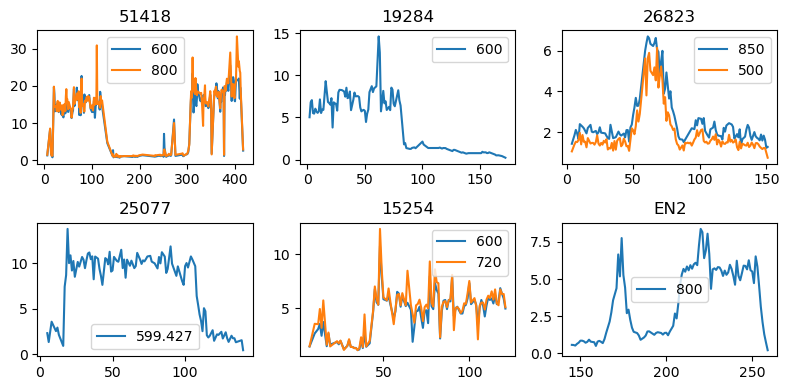

In [141]:
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(2,3,figsize=(8,4))
for i,entry in enumerate(partially_disordered):
    for field in partially_disordered[entry]['full']:
        axs[i//3,i%3].plot(partially_disordered[entry]['full'][field]['residues'],partially_disordered[entry]['full'][field]['effTimes'],label=field)
    axs[i//3,i%3].legend()
    axs[i//3,i%3].set_title(entry)
#plt.savefig('suitable_partially_disordered.pdf')

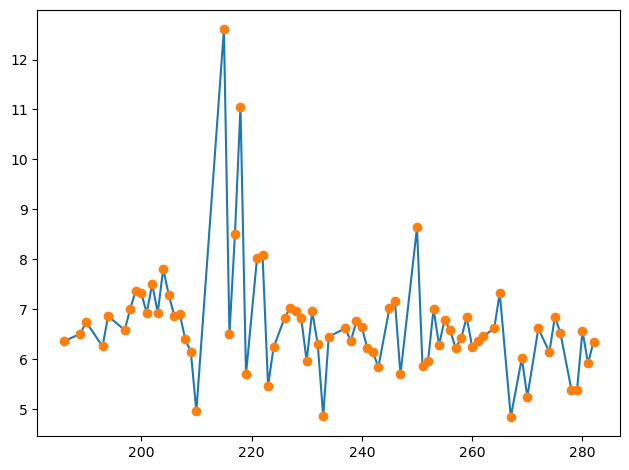

In [273]:
entry='tonB'
beg=52
end=-2
field='850'
plt.plot(partially_disordered[entry]['full'][field]['residues'][beg:end],partially_disordered[entry]['full'][field]['effTimes'][beg:end])
plt.plot(partially_disordered[entry]['full'][field]['residues'][beg:end],partially_disordered[entry]['full'][field]['effTimes'][beg:end],'o')

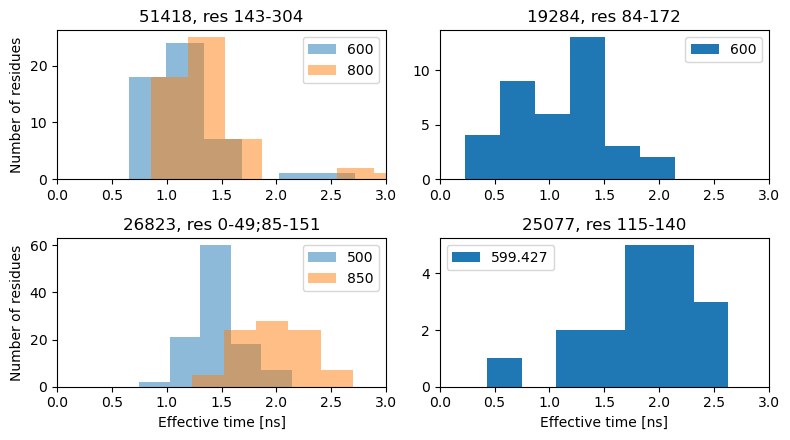

In [102]:
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(2,2,figsize=(8,4.5))

entry='51418'
for field in partially_disordered[entry]['full']:
    bins=int(max(partially_disordered[entry]['full'][field]['effTimes'][83:137])-min(partially_disordered[entry]['full'][field]['effTimes'][83:137]))
    axs[0,0].hist(partially_disordered[entry]['full'][field]['effTimes'][83:137],label=field,bins=bins*3,alpha=0.5)
axs[0,0].legend()
axs[0,0].set_title(f'{entry}, res 143-304')
axs[0,0].set_ylabel(f'Number of residues')

entry='19284'
for field in partially_disordered[entry]['full']:
    bins=(max(partially_disordered[entry]['full'][field]['effTimes'][68:])-min(partially_disordered[entry]['full'][field]['effTimes'][68:]))
    axs[0,1].hist(partially_disordered[entry]['full'][field]['effTimes'][68:],label=field,bins=int(bins*3+1))
axs[0,1].legend()
axs[0,1].set_title(f'{entry}, res 84-172')


entry='26823'
field='500'
bins=(max(list(partially_disordered[entry]['full'][field]['effTimes'][:43])+list(partially_disordered[entry]['full'][field]['effTimes'][75:]))-min(list(partially_disordered[entry]['full'][field]['effTimes'][:43])+list(partially_disordered[entry]['full'][field]['effTimes'][75:])))
axs[1,0].hist(list(partially_disordered[entry]['full'][field]['effTimes'][:43])+list(partially_disordered[entry]['full'][field]['effTimes'][75:]),label=field,bins=int(bins*3+1),alpha=0.5)
field='850'
bins=(max(list(partially_disordered[entry]['full'][field]['effTimes'][:34])+list(partially_disordered[entry]['full'][field]['effTimes'][65:]))-min(list(partially_disordered[entry]['full'][field]['effTimes'][:43])+list(partially_disordered[entry]['full'][field]['effTimes'][65:])))
axs[1,0].hist(list(partially_disordered[entry]['full'][field]['effTimes'][:34])+list(partially_disordered[entry]['full'][field]['effTimes'][65:]),label=field,bins=int(bins*3+1),alpha=0.5)
axs[1,0].legend()
axs[1,0].set_title(f'{entry}, res 0-49;85-151')
axs[1,0].set_ylabel(f'Number of residues')
axs[1,0].set_xlabel(f'Effective time [ns]')

entry='25077'
for field in partially_disordered[entry]['full']:
    bins=(max(partially_disordered[entry]['full'][field]['effTimes'][85:])-min(partially_disordered[entry]['full'][field]['effTimes'][85:]))
    axs[1,1].hist(partially_disordered[entry]['full'][field]['effTimes'][85:],label=field,bins=int(bins*3+1))
axs[1,1].legend()
axs[1,1].set_title(f'{entry}, res 115-140')
axs[1,1].set_xlabel(f'Effective time [ns]')

for i in range(2):
    for j in range(2):
        axs[i,j].set_xlim(0,3)

plt.savefig('suitable_partially_disordered_hist2.pdf')

143
304
143
304


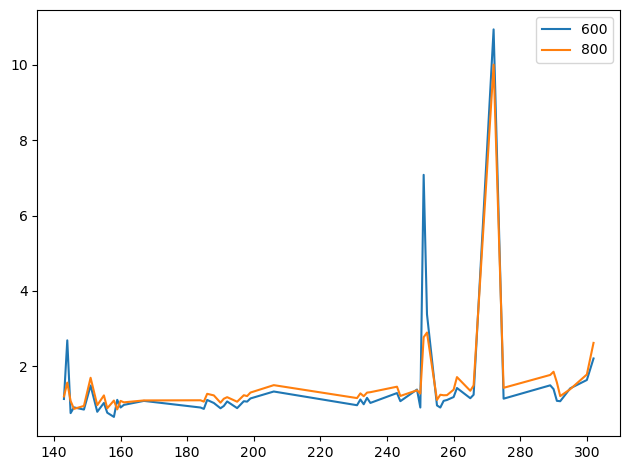

In [71]:
entries=['51418']
for entry in entries:
    for field in experiments[entry]:
            try:
                effTimes=[]
                for R2 in experiments[entry][field]["results"]["R2"]:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                plt.plot(experiments[entry][field]["results"]["atomID"][83:137],np.array(effTimes)[83:137]*10**9,"-",label=field)
                #plt.plot(secondary_structure[entry]["residues"],secondary_structure[entry]["codes"],"o",c="C3")
                #plt.show()
                print(experiments[entry][field]["results"]["atomID"][83])
                print(experiments[entry][field]["results"]["atomID"][137])
                plt.legend()
                if np.mean(effTimes)>2.0*10**(-7):
                    print(entry)
                #if entry=="30834" or entry=="15930" or entry=="26788":
                #     ax[1].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"s",c="C3",markersize=10)
            except Exception as e:

                pass
    

'bool' object is not subscriptable
'bool' object is not subscriptable
'results'
'NoneType' object is not subscriptable
84
172


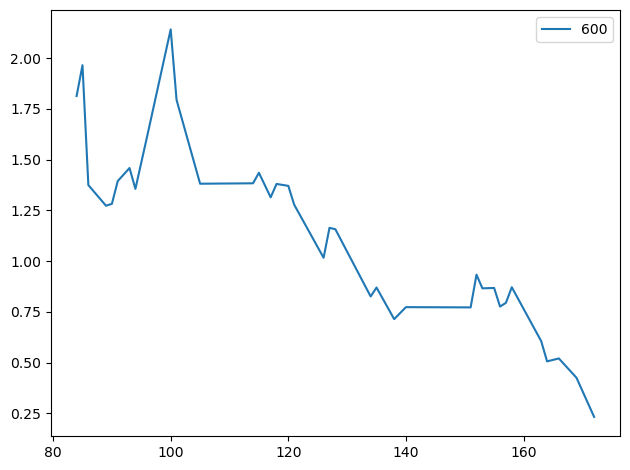

In [80]:
entries=['19284']
for entry in entries:
    for field in experiments[entry]:
            try:
                effTimes=[]
                for R2 in experiments[entry][field]["results"]["R2"]:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                plt.plot(experiments[entry][field]["results"]["atomID"][68:],np.array(effTimes)[68:]*10**9,"-",label=field)
                #plt.plot(secondary_structure[entry]["residues"],secondary_structure[entry]["codes"],"o",c="C3")
                #plt.show()
                print(experiments[entry][field]["results"]["atomID"][68])
                print(experiments[entry][field]["results"]["atomID"][-1])
                plt.legend()
                if np.mean(effTimes)>2.0*10**(-7):
                    print(entry)
                #if entry=="30834" or entry=="15930" or entry=="26788":
                #     ax[1].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"s",c="C3",markersize=10)
            except Exception as e:
                print(e)
                pass

'bool' object is not subscriptable
'bool' object is not subscriptable
'results'
'NoneType' object is not subscriptable
49
85
49
85
151
49
85
49
85
151


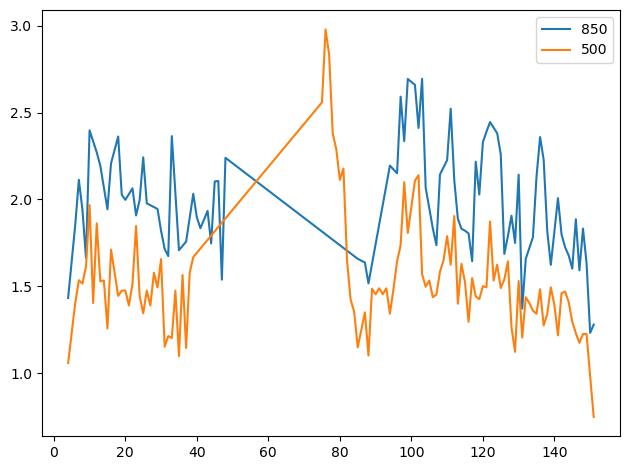

In [95]:
entries=['26823']
for entry in entries:
    for field in experiments[entry]:
            try:
                effTimes=[]
                for R2 in experiments[entry][field]["results"]["R2"]:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                plt.plot(experiments[entry][field]["results"]["atomID"][:34]+experiments[entry][field]["results"]["atomID"][65:],list(np.array(effTimes)[:34]*10**9)+list(np.array(effTimes)[65:]*10**9),"-",label=field)
                #plt.plot(secondary_structure[entry]["residues"],secondary_structure[entry]["codes"],"o",c="C3")
                #plt.show()
                print(experiments[entry]['850']["results"]["atomID"][34])
                print(experiments[entry]['850']["results"]["atomID"][65])
                print(experiments[entry]['500']["results"]["atomID"][43])
                print(experiments[entry]['500']["results"]["atomID"][75])
                print(experiments[entry][field]["results"]["atomID"][-1])
                plt.legend()
                if np.mean(effTimes)>2.0*10**(-7):
                    print(entry)
                #if entry=="30834" or entry=="15930" or entry=="26788":
                #     ax[1].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"s",c="C3",markersize=10)
            except Exception as e:
                print(e)
                pass

115
140


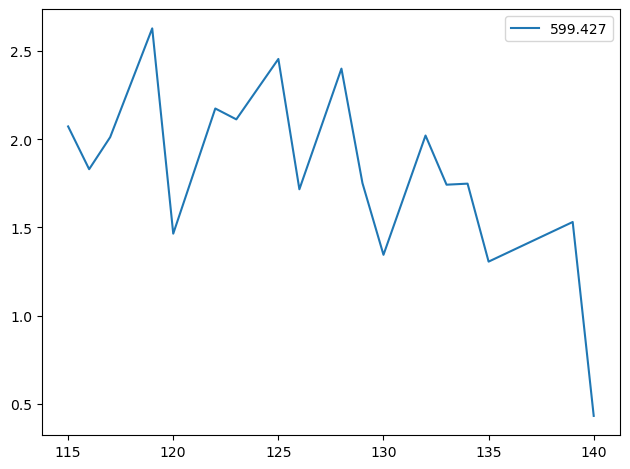

In [100]:
entries=['25077']
for entry in entries:
    for field in experiments[entry]:
            try:
                effTimes=[]
                for R2 in experiments[entry][field]["results"]["R2"]:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                plt.plot(experiments[entry][field]["results"]["atomID"][85:],np.array(effTimes)[85:]*10**9,"-",label=field)
                #plt.plot(secondary_structure[entry]["residues"],secondary_structure[entry]["codes"],"o",c="C3")
                #plt.show()
                
                print(experiments[entry][field]["results"]["atomID"][85])
                print(experiments[entry][field]["results"]["atomID"][-1])
                plt.legend()
                if np.mean(effTimes)>2.0*10**(-7):
                    print(entry)
                #if entry=="30834" or entry=="15930" or entry=="26788":
                #     ax[1].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"s",c="C3",markersize=10)
            except Exception as e:

                pass

In [153]:
[]+[3]

[3]

/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


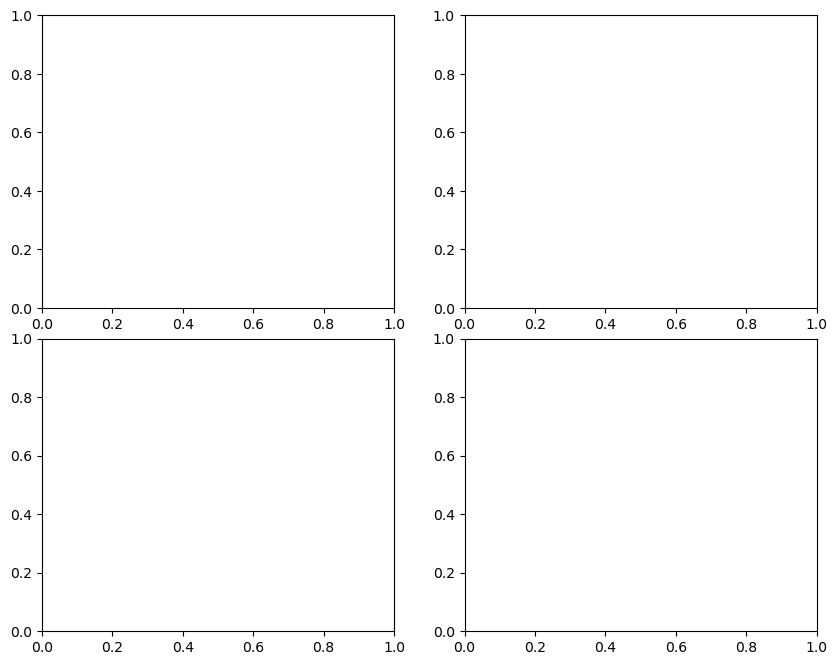

In [211]:
import matplotlib.pyplot as plt

# Create a figure and a grid of 6x2 subplots
fig = plt.figure(figsize=(10, 8))
grid = plt.GridSpec(6, 2, hspace=0.4, wspace=0.2)

# Create subplots and specify which subplots share the x-axis
ax1 = plt.subplot(grid[0:3, 0])
ax2 = plt.subplot(grid[3:, 0], sharex=ax1)
ax3 = plt.subplot(grid[0:3, 1])
ax4 = plt.subplot(grid[3:, 1], sharex=ax3)

# You can continue this pattern for the remaining subplots

# Plot your data in each subplot
#ax1.plot(x_data1, y_data1, label='Plot 1')
#ax2.plot(x_data2, y_data2, label='Plot 2')
#ax3.plot(x_data3, y_data3, label='Plot 3')
#ax4.plot(x_data4, y_data4, label='Plot 4')

# Customize the appearance as needed

# Show the plots
plt.show()